# UAS Data Mining

Anggota Kelompok:

*   Ricky - 2106724952
*   Andri Naufal Al'afif - 2106725085
*   Kalisha Rahma Firza - 2106725053
*   Selvira Salsabila - 2106656232
*   Sabrina Zahra Salsabila - 2106726895










#Modul and Packages

Import package yang akan digunakan untuk pengolahan data sebagai berikut:

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
import gdown
import random
import plotly.express as px
from scipy import stats
from scipy.stats import shapiro, anderson
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from IPython.display import Image, display
import requests

#Input Data

Import data set yang akan digunakan untuk analisa sebagai berikut:

In [ ]:
#Import Data Set
!gdown 1RSkEOn6UldxS1VEC7-2lPLhvZ_MtfgHc
data = pd.read_csv("/content/data_kesehatan-Mental-SRQ-2023-Filtered.csv", sep = ";")

Downloading...
From: https://drive.google.com/uc?id=1RSkEOn6UldxS1VEC7-2lPLhvZ_MtfgHc
To: /content/data_kesehatan-Mental-SRQ-2023-Filtered.csv
100% 194M/194M [00:01<00:00, 134MB/s]


In [ ]:
data.head()

,ID,WILAYAH,JENIS KELAMIN,USIA,LAMA BERDINAS,PENDIDIKAN TERAKHIR,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,...,Sumber air bersih di tempat tinggal saudara ?,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,Kelompok Umur,NILAI IMT,IMT
0,1,KALBAR,LAKI - LAKI,34.0,16.0,SMA,168.9,85.0,100.0,Menikah,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,25 - 34,29.8,Obesitas
1,2,KALBAR,LAKI - LAKI,43.0,23.0,SMA,169.5,70.0,80.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,24.36,Normal
2,3,KALBAR,LAKI - LAKI,21.0,1.0,SMA,169.5,60.0,78.0,Belum Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,Tidak ada,NaN,Tidak ada,15 - 24,20.88,Normal
3,4,KALBAR,LAKI - LAKI,40.0,23.0,S2,166.8,80.0,34.0,Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,28.75,Obesitas
4,5,KALBAR,LAKI - LAKI,28.0,9.0,SMA,164.5,62.0,32.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,25 - 34,22.91,Normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype  
---  ------                                                                                                             --------------   -----  
 0   ID                                                                                                                 289801 non-null  int64  
 1   WILAYAH                                                                                                            289801 non-null  object 
 2   JENIS KELAMIN                                                                                                      289801 non-null  object 
 3   USIA                                                                                                               289801 non-null  float64
 4   LAMA BERDINAS 

#Preprocessing

##Drop Data dan Cek Tipe Data

Pada bagian ini, dilakukan drop untuk variabel-variabel yang tidak kami gunakan untuk pengolahan data. Kemudian kami melihat tipe dari masing-masing variabel dimana kemudian kami ubah dengan yang lebih sesuai untuk pengolahan data.

In [ ]:
  data = data.drop(['ID',"Berapa lama saudara menggosok gigi ?","Dalam sehari, berapa kali Saudara mengganti pakaian dalam?",
                    "Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?","Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?",
                    "Apakah tempat tinggal Saudara mempunyai penghawaan/sirkulasi udara yang cukup?","Apakah lingkungan tempat tinggal Saudara saat ini terkontaminasi/ terganggu akibat polusi udara yang tidak sehat?",
                    "Sumber air bersih di tempat tinggal saudara ?","Penggunaan air bersih untuk makan & minum bersumber dari : ","Berapa jarak jamban dengan sumur dirumah saudara ?","Bagaimana saluran pembuangan air (sanitasi) rumah tangga?",
                    "Apakah terdapat tempat sampah di sekitar rumah? ","Berapa jarak tempat sampah dengan rumah saudara ?", "Berapa lama saudara mandi ?","Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?",
                    "Jika Ya berapa jumlah gigi saudara yang Karies","Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)",
                    "Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?",
                    "Jika Ya, Berapa Batang Saudara merokok dalam sehari?","Kelompok Umur","Pencernaan anda terganggu / buruk ?",
                    "Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?","Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?",
                    "Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?","Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?","Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?",
                    "Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?","Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?","Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?",
                    "Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?","Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?","Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?",
                    "Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?","Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?","Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?",
                    "Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?","Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?","Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?"], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 42 columns):
 #   Column                                                                                     Non-Null Count   Dtype  
---  ------                                                                                     --------------   -----  
 0   WILAYAH                                                                                    289801 non-null  object 
 1   JENIS KELAMIN                                                                              289801 non-null  object 
 2   USIA                                                                                       289801 non-null  float64
 3   LAMA BERDINAS                                                                              289801 non-null  float64
 4   PENDIDIKAN TERAKHIR                                                                        289801 non-null  object 
 5   TINGGI BADAN                         

In [ ]:
data["IMT"] = data["IMT"].astype("category")
data["Merasa lelah sepanjang waktu?"] = data["Merasa lelah sepanjang waktu?"].astype("category")
data["WILAYAH"]=data["WILAYAH"].astype("category")
data["JENIS KELAMIN"]=data["JENIS KELAMIN"].astype("category")
data["PENDIDIKAN TERAKHIR"]=data["PENDIDIKAN TERAKHIR"].astype("category")
data["Status Perkawinan"]=data["Status Perkawinan"].astype("category")
data["PENGELUARAN/BULAN"]=data["PENGELUARAN/BULAN"].astype("category")
data["Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?"]=data["Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?"].astype("category")
data["Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?"]=data["Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?"].astype("category")
data["Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?"]=data["Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?"].astype("category")
data["Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?"]=data["Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?"].astype("category")
data["Sering menderita sakit kepala ?"]=data["Sering menderita sakit kepala ?"].astype("category")
data["Tidak nafsu makan ?"]=data["Tidak nafsu makan ?"].astype("category")
data["Sulit tidur ?"]=data["Sulit tidur ?"].astype("category")
data["Mudah takut ?"]=data["Mudah takut ?"].astype("category")
data["Merasa tegang, cemas atau kuatir ?"]=data["Merasa tegang, cemas atau kuatir ?"].astype("category")
data["Tangan anda gemetar ?"]=data["Tangan anda gemetar ?"].astype("category")
data["Sulit untuk berpikir jernih ?"]=data["Sulit untuk berpikir jernih ?"].astype("category")
data["Pekerjaan anda sehari – hari terganggu ?"] =data["Pekerjaan anda sehari – hari terganggu ?"].astype("category")
data["Merasa tidak bahagia ?"]=data["Merasa tidak bahagia ?"].astype("category")
data["Menangis lebih sering ?"]=data["Menangis lebih sering ?"].astype("category")
data["Merasa sulit untuk menikmati kegiatan sehari – hari?"]=data["Merasa sulit untuk menikmati kegiatan sehari – hari?"].astype("category")
data["Sulit untuk mengambil keputusan ?"]=data["Sulit untuk mengambil keputusan ?"].astype("category")
data["Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?"]=data["Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?"].astype("category")
data["Kehilangan minat pada berbagai hal ?"]=data["Kehilangan minat pada berbagai hal ?"].astype("category")
data["Tidak merasa berharga?"]=data["Tidak merasa berharga?"].astype("category")
data["Mempunyai pikiran untuk mengakhiri hidup?"]=data["Mempunyai pikiran untuk mengakhiri hidup?"].astype("category")
data["Merasa lelah sepanjang waktu?"]=data["Merasa lelah sepanjang waktu?"].astype("category")
data["Mengalami rasa tidak enak di perut?"]=data["Mengalami rasa tidak enak di perut?"].astype("category")
data["Mudah lelah ?"]=data["Mudah lelah ?"].astype("category")
data["Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?"]=data["Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?"].astype("category")
data["Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?"]=data["Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?"].astype("category")
data["Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?"]=data["Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?"].astype("category")
data["Apakah saudara merokok ?"]=data["Apakah saudara merokok ?"].astype("category")
data["Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?"]=data["Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?"].astype("category")
data["Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?"]=data["Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?"].astype("category")
data["Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari"]=data["Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari"].astype("category")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 42 columns):
 #   Column                                                                                     Non-Null Count   Dtype   
---  ------                                                                                     --------------   -----   
 0   WILAYAH                                                                                    289801 non-null  category
 1   JENIS KELAMIN                                                                              289801 non-null  category
 2   USIA                                                                                       289801 non-null  float64 
 3   LAMA BERDINAS                                                                              289801 non-null  float64 
 4   PENDIDIKAN TERAKHIR                                                                        289801 non-null  category
 5   TINGGI BADAN                  

##Cek Missing Value dan Duplikat

Akan di cek dan dihapus missing value yang terdapat pada data. Selanjutnya di cek juga untuk data terduplikasi untuk kemudian di hapus agar data menjadi lebih baik.

In [ ]:
data.isna().sum()

WILAYAH                                                                                      0
JENIS KELAMIN                                                                                0
USIA                                                                                         0
LAMA BERDINAS                                                                                0
PENDIDIKAN TERAKHIR                                                                          0
TINGGI BADAN                                                                                 0
BERAT BADAN                                                                                  0
LINGKAR PINGGANG                                                                             0
Status Perkawinan                                                                            0
PENGELUARAN/BULAN                                                                            0
Apakah saudara pernah di diagnosa atau menderita p

In [ ]:
data = data.dropna(how ='all', axis=0)

In [ ]:
data.duplicated().sum()

89

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(289712, 42)

##Cek Variabel

Pada bagian ini, kami mengecek beberapa variabel yang akan digunakan untuk analisis lebih lanjut.

###Tinggi badan

Untuk variabel "tinggi badan", dilakukan koreksi pada beberapa data karena terdapat kesalahan dalam penulisan. Kemudian di cek outlier yang terdapat variabel ini dan dipisahkan.

In [ ]:
data["TINGGI BADAN"].unique()

array(['168.9', '169.5', '166.8', '164.5', '165.5', '168.5', '175',
       '172.5', '166.5', '166', '172', '167', '175.8', '163.5', '167.8',
       '72.5', '168.8', '174.5', '161', '172.6', '160.5', '175.5',
       '171.5', '17', '165', '170', '150', '165.9', '156', '168', '167.5',
       '166.3', '159.5', '169', '173.5', '171', '1.65', '166.9', '176.5',
       '1.71', '166.6', '1.76', '171.3', '156.5', '157.5', '17,1 ', '160',
       '1.75', '1.66', '1.72', '1.68', '162.5', '17,5', '177.5', '169.2',
       '178', '176', '180.5', '16,6', '1.7', '178.5', '167.2', '171.8',
       '170.3', '165.4', '1.69', '173.4', '170.2', '15,5', '182', '158.5',
       '185.5', '158', '164.4', '165.7', '167.6', '1.64', '161.5',
       '179.5', '165.58', '169.7', '168.2', '1.77', '173', '170.5',
       '17,6', '163', '16,7', '164', '171.6', '176.6', '16.39', '188.5',
       '173.8', '172.8', '164.7', '155', '174.8', '168.58', '5', '174',
       '153', '180', '181', '16', '177', '162', '159', '187', '15',

In [ ]:
data["TINGGI BADAN"] = data["TINGGI BADAN"].replace(",","", regex=True)

In [ ]:
data["TINGGI BADAN"] = data["TINGGI BADAN"].astype(float)

In [ ]:
data.loc[data["TINGGI BADAN"] < 2, "TINGGI BADAN"] = data["TINGGI BADAN"]*100

In [ ]:
Q1 = data['TINGGI BADAN'].quantile(0.25)
Q3 = data['TINGGI BADAN'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned_tb = data[(data['TINGGI BADAN'] >= lower_bound) & (data['TINGGI BADAN'] <= upper_bound)]

Text(0.5, 1.0, 'Tinggi Badan tanpa Outlier')

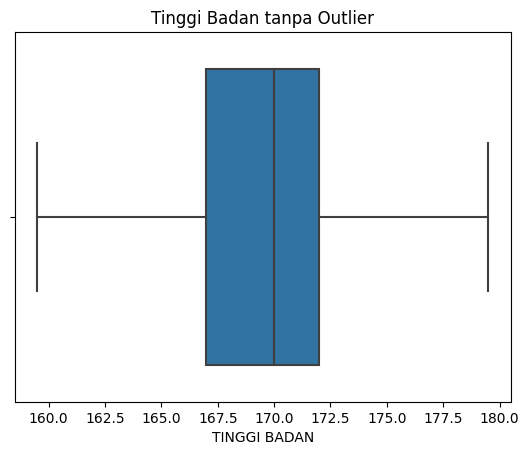

In [ ]:
sns.boxplot(x='TINGGI BADAN', data=data_cleaned_tb)
plt.title('Tinggi Badan tanpa Outlier')

###Berat Badan

Untuk variabel "berat badan", proses yang mirip seperti untuk "tinggi badan" dimana dilakukan koreksi pada beberapa data karena terdapat kesalahan dalam penulisan. Kemudian di cek outlier yang terdapat variabel ini dan dipisahkan.

In [ ]:
data.loc[data["BERAT BADAN"] < 10, "BERAT BADAN"] = data["BERAT BADAN"]*10

In [ ]:
data["BERAT BADAN"] = data["BERAT BADAN"].astype(float)

In [ ]:
Q1 = data['BERAT BADAN'].quantile(0.25)
Q3 = data['BERAT BADAN'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned_bb = data[(data['BERAT BADAN'] >= lower_bound) & (data['BERAT BADAN'] <= upper_bound)]

Text(0.5, 1.0, 'Berat Badan tanpa Outlier')

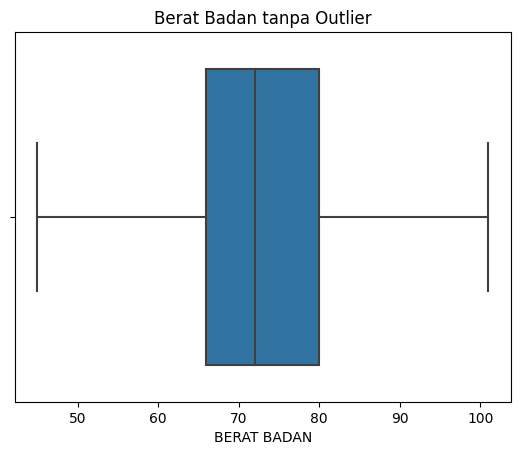

In [ ]:
sns.boxplot(x='BERAT BADAN', data=data_cleaned_bb)
plt.title('Berat Badan tanpa Outlier')

###Usia

Untuk variabel "usia", dilakukan pengubahan untuk tipe data agar lebih sesuai. Kemudian di cek outlier yang terdapat variabel ini dan dipisahkan.

In [ ]:
data["USIA"] = data["USIA"].astype(int)

In [ ]:
Q1 = data['USIA'].quantile(0.25)
Q3 = data['USIA'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned_usia = data[(data['USIA'] >= lower_bound) & (data['USIA'] <= upper_bound)]

Text(0.5, 1.0, 'Usia tanpa Outlier')

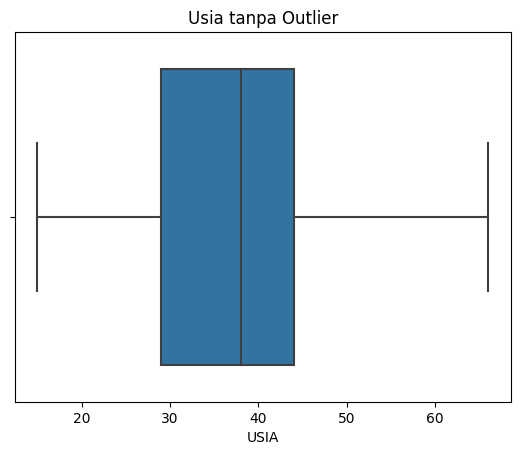

In [ ]:
sns.boxplot(x='USIA', data=data_cleaned_usia)
plt.title('Usia tanpa Outlier')

###Lingkar pinggang

Untuk variabel "lingkar pinggang", dilakukan koreksi pada beberapa data karena terdapat kesalahan dalam penulisan. Kemudian di cek outlier yang terdapat variabel ini dan dipisahkan.

In [ ]:
data["LINGKAR PINGGANG"] = data["LINGKAR PINGGANG"].replace("-","", regex =True)

In [ ]:
data["LINGKAR PINGGANG"] = data["LINGKAR PINGGANG"].astype(float)

In [ ]:
Q1 = data['LINGKAR PINGGANG'].quantile(0.25)
Q3 = data['LINGKAR PINGGANG'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned_lp = data[(data['LINGKAR PINGGANG'] >= lower_bound) & (data['LINGKAR PINGGANG'] <= upper_bound)]

Text(0.5, 1.0, 'Lingkar Pinggang tanpa Outlier')

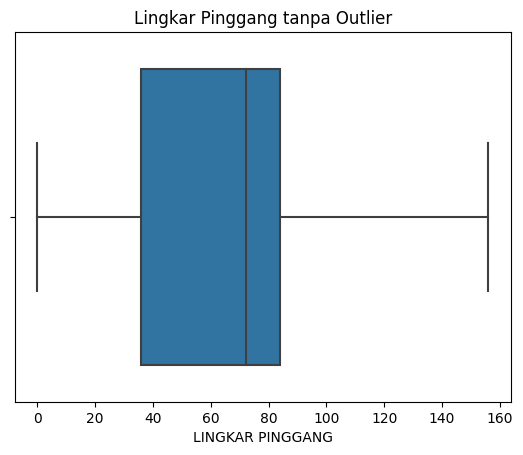

In [ ]:
sns.boxplot(x='LINGKAR PINGGANG', data=data_cleaned_lp)
plt.title('Lingkar Pinggang tanpa Outlier')

###Lama Berdinas

Untuk variabel "lama berdinas", dilakukan pengubahan untuk tipe data agar lebih sesuai. Kemudian di cek outlier yang terdapat variabel ini dan dipisahkan.

In [ ]:
data["LAMA BERDINAS"] = data["LAMA BERDINAS"].astype(float)

In [ ]:
Q1 = data['LAMA BERDINAS'].quantile(0.25)
Q3 = data['LAMA BERDINAS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned_dinas = data[(data['LAMA BERDINAS'] >= lower_bound) & (data['LAMA BERDINAS'] <= upper_bound)]

Text(0.5, 1.0, 'Lama Berdinas tanpa Outlier')

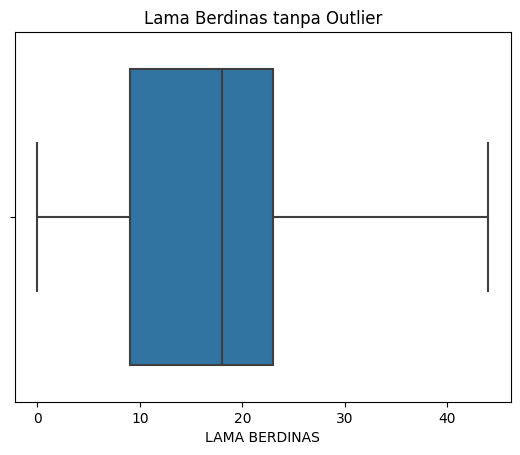

In [ ]:
sns.boxplot(x='LAMA BERDINAS', data=data_cleaned_dinas)
plt.title('Lama Berdinas tanpa Outlier')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289712 entries, 0 to 289800
Data columns (total 42 columns):
 #   Column                                                                                     Non-Null Count   Dtype   
---  ------                                                                                     --------------   -----   
 0   WILAYAH                                                                                    289712 non-null  category
 1   JENIS KELAMIN                                                                              289712 non-null  category
 2   USIA                                                                                       289712 non-null  int64   
 3   LAMA BERDINAS                                                                              289712 non-null  float64 
 4   PENDIDIKAN TERAKHIR                                                                        289712 non-null  category
 5   TINGGI BADAN                  

##Kelompok Lama Berdinas

Pada bagian ini, dibuat kolom baru yang berisikan kelompok rentan untuk "lama berdinas" dimana dibagi menjadi 1-10 tahun, 11-20 tahun, 21-30 tahun, 31-40 tahun, 41-50 tahun, dan >50 tahun.

In [ ]:
bins = [0, 10, 20, 30, 40, 50, float('inf')]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '>50']

data['Kelompok Lama Berdinas'] = pd.cut(data['LAMA BERDINAS'], bins=bins, labels=labels, right=False)

In [ ]:
data['Kelompok Lama Berdinas']

0         11-20
1         21-30
2          1-10
3         21-30
4          1-10
          ...  
289796     1-10
289797    21-30
289798      >50
289799    11-20
289800     1-10
Name: Kelompok Lama Berdinas, Length: 289712, dtype: category
Categories (6, object): ['1-10' < '11-20' < '21-30' < '31-40' < '41-50' < '>50']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289712 entries, 0 to 289800
Data columns (total 43 columns):
 #   Column                                                                                     Non-Null Count   Dtype   
---  ------                                                                                     --------------   -----   
 0   WILAYAH                                                                                    289712 non-null  category
 1   JENIS KELAMIN                                                                              289712 non-null  category
 2   USIA                                                                                       289712 non-null  int64   
 3   LAMA BERDINAS                                                                              289712 non-null  float64 
 4   PENDIDIKAN TERAKHIR                                                                        289712 non-null  category
 5   TINGGI BADAN                  

##Penggabungan Data

Dari hasil pengubahan variabel-variabel sebelumnya, kami gabungkan untuk membuat data set baru yang sudah bersih dengan nama "data_combined".

In [ ]:
data_combined = pd.concat([data_cleaned_tb["TINGGI BADAN"], data_cleaned_bb["BERAT BADAN"], data_cleaned_usia["USIA"], data_cleaned_lp["LINGKAR PINGGANG"], data_cleaned_dinas["LAMA BERDINAS"],
                           data["WILAYAH"], data["JENIS KELAMIN"], data["PENDIDIKAN TERAKHIR"],data["Status Perkawinan"], data["PENGELUARAN/BULAN"], data["Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?"],
                          data["Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?"],data["Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?"],data["Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?"],
                           data["Sering menderita sakit kepala ?"],data["Tidak nafsu makan ?"],data["Sulit tidur ?"],data["Mudah takut ?"],data["Merasa tegang, cemas atau kuatir ?"],data["Tangan anda gemetar ?"],data["Sulit untuk berpikir jernih ?"],
                           data["Merasa tidak bahagia ?"],data["Menangis lebih sering ?"],data["Merasa sulit untuk menikmati kegiatan sehari – hari?"],data["Sulit untuk mengambil keputusan ?"],data["Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?"],
                           data["Kehilangan minat pada berbagai hal ?"],data["Tidak merasa berharga?"],data["Mempunyai pikiran untuk mengakhiri hidup?"],data["Merasa lelah sepanjang waktu?"],data["Mengalami rasa tidak enak di perut?"],data["Mudah lelah ?"],
                           data["Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?"],data["Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?"],data["Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?"],
                           data["Apakah saudara merokok ?"],data["Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?"],data["Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?"],
                           data["Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari"],data['Kelompok Lama Berdinas']], axis=1, join="inner")

In [ ]:
data_combined

,TINGGI BADAN,BERAT BADAN,USIA,LINGKAR PINGGANG,LAMA BERDINAS,WILAYAH,JENIS KELAMIN,PENDIDIKAN TERAKHIR,Status Perkawinan,PENGELUARAN/BULAN,...,Mengalami rasa tidak enak di perut?,Mudah lelah ?,Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?,Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?,Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?,Apakah saudara merokok ?,Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?,Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?,Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari,Kelompok Lama Berdinas
0,168.9,85.0,34,100.0,16.0,KALBAR,LAKI - LAKI,SMA,Menikah,Rp. 7 Juta s.d. 10 Juta,...,Tidak,Tidak,4 kali atau lebih dalam seminggu,Lebih dari 2 liter,Kurang dari 400gr,Ya,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,11-20
1,169.5,70.0,43,80.0,23.0,KALBAR,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Tidak,Tidak,4 kali atau lebih dalam seminggu,Lebih dari 2 liter,Kurang dari 400gr,Tidak,Tidak pernah,Tidak pernah,Tidak pernah,21-30
2,169.5,60.0,21,78.0,1.0,KALBAR,LAKI - LAKI,SMA,Belum Menikah,Rp. 2 Juta s.d. 6 Juta,...,Tidak,Tidak,4 kali atau lebih dalam seminggu,2 Liter,400gr/lebih,Tidak,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,1-10
3,166.8,80.0,40,34.0,23.0,KALBAR,LAKI - LAKI,S2,Menikah,Rp. 7 Juta s.d. 10 Juta,...,Tidak,Tidak,Kurang dari 4 kali dalam seminggu,2 Liter,Kurang dari 400gr,Tidak,Lebih dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,21-30
4,164.5,62.0,28,32.0,9.0,KALBAR,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Tidak,Tidak,Kurang dari 4 kali dalam seminggu,2 Liter,Kurang dari 400gr,Ya,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,1-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289794,169.0,60.0,46,32.0,26.0,DIY,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Tidak,Tidak,Kurang dari 4 kali dalam seminggu,2 Liter,400gr/lebih,Ya,Kurang dari 6 sendok teh,Tidak pernah,Tidak pernah,21-30
289795,169.0,60.0,53,70.0,33.0,JATENG,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Tidak,Tidak,4 kali atau lebih dalam seminggu,Lebih dari 2 liter,400gr/lebih,Ya,Kurang dari 6 sendok teh,Tidak pernah,Tidak pernah,31-40
289796,169.0,60.0,23,78.0,4.0,KALSEL,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Tidak,Tidak,4 kali atau lebih dalam seminggu,Lebih dari 2 liter,400gr/lebih,Tidak,Kurang dari 6 sendok teh,Kurang dari 25ml,1 - 2 kali/hari,1-10
289799,179.0,55.0,35,68.0,17.0,JABAR,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Tidak,Tidak,Kurang dari 4 kali dalam seminggu,Lebih dari 2 liter,Kurang dari 400gr,Ya,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,11-20


In [ ]:
data_combined = data_combined.dropna(how="any", axis = 0)

In [ ]:
data_combined.loc[data_combined['USIA'] <= 24, 'KELOMPOK USIA'] = '15-24'
data_combined.loc[(data_combined['USIA'] > 24) & (data_combined["USIA"] <=34), 'KELOMPOK USIA'] = '25-34'
data_combined.loc[(data_combined['USIA'] > 34) & (data_combined["USIA"] <=44), 'KELOMPOK USIA'] = '35-44'
data_combined.loc[(data_combined['USIA'] >44) & (data_combined["USIA"] <=54), 'KELOMPOK USIA'] = '45-54'
data_combined.loc[(data_combined['USIA'] >54) & (data_combined["USIA"] <=64), 'KELOMPOK USIA'] = '54-64'
data_combined.loc[data_combined['USIA'] > 64, 'KELOMPOK USIA'] = '>=65'

In [ ]:
data_combined["KELOMPOK USIA"] = data_combined["KELOMPOK USIA"].astype("category")

In [ ]:
data_combined["NILAI IMT"] = data_cleaned_bb["BERAT BADAN"]/((data_cleaned_tb["TINGGI BADAN"]/100)**2)

In [ ]:
data_combined["NILAI IMT"] = data_combined["NILAI IMT"].astype(float)

In [ ]:
data_combined.loc[data_combined['NILAI IMT'] < 17, 'IMT'] = 'Sangat Kurus'
data_combined.loc[(data_combined['NILAI IMT'] >= 17) & (data_combined["NILAI IMT"] <18.5), 'IMT'] = 'Kurus'
data_combined.loc[(data_combined['NILAI IMT'] >= 18.5) & (data_combined["NILAI IMT"] <25), 'IMT'] = 'Normal'
data_combined.loc[(data_combined['NILAI IMT'] >= 25) & (data_combined["NILAI IMT"] <=27), 'IMT'] = 'Gemuk'
data_combined.loc[data_combined['NILAI IMT'] > 27, 'IMT'] = 'Obesitas'

In [ ]:
data_combined["IMT"] = data_combined["IMT"].astype("category")

In [ ]:
data_combined

,TINGGI BADAN,BERAT BADAN,USIA,LINGKAR PINGGANG,LAMA BERDINAS,WILAYAH,JENIS KELAMIN,PENDIDIKAN TERAKHIR,Status Perkawinan,PENGELUARAN/BULAN,...,Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?,Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?,Apakah saudara merokok ?,Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?,Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?,Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari,Kelompok Lama Berdinas,KELOMPOK USIA,NILAI IMT,IMT
0,168.9,85.0,34,100.0,16.0,KALBAR,LAKI - LAKI,SMA,Menikah,Rp. 7 Juta s.d. 10 Juta,...,Lebih dari 2 liter,Kurang dari 400gr,Ya,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,11-20,25-34,29.796114,Obesitas
1,169.5,70.0,43,80.0,23.0,KALBAR,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Lebih dari 2 liter,Kurang dari 400gr,Tidak,Tidak pernah,Tidak pernah,Tidak pernah,21-30,35-44,24.364563,Normal
2,169.5,60.0,21,78.0,1.0,KALBAR,LAKI - LAKI,SMA,Belum Menikah,Rp. 2 Juta s.d. 6 Juta,...,2 Liter,400gr/lebih,Tidak,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,1-10,15-24,20.883912,Normal
3,166.8,80.0,40,34.0,23.0,KALBAR,LAKI - LAKI,S2,Menikah,Rp. 7 Juta s.d. 10 Juta,...,2 Liter,Kurang dari 400gr,Tidak,Lebih dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,21-30,35-44,28.753975,Obesitas
4,164.5,62.0,28,32.0,9.0,KALBAR,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,2 Liter,Kurang dari 400gr,Ya,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,1-10,25-34,22.911836,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289794,169.0,60.0,46,32.0,26.0,DIY,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,2 Liter,400gr/lebih,Ya,Kurang dari 6 sendok teh,Tidak pernah,Tidak pernah,21-30,45-54,21.007668,Normal
289795,169.0,60.0,53,70.0,33.0,JATENG,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Lebih dari 2 liter,400gr/lebih,Ya,Kurang dari 6 sendok teh,Tidak pernah,Tidak pernah,31-40,45-54,21.007668,Normal
289796,169.0,60.0,23,78.0,4.0,KALSEL,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Lebih dari 2 liter,400gr/lebih,Tidak,Kurang dari 6 sendok teh,Kurang dari 25ml,1 - 2 kali/hari,1-10,15-24,21.007668,Normal
289799,179.0,55.0,35,68.0,17.0,JABAR,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Lebih dari 2 liter,Kurang dari 400gr,Ya,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,11-20,35-44,17.165507,Kurus


In [ ]:
data_combined.to_csv("data_combined.csv")

#Save Preprocessing

Dari seluruh rangkaian pre-processing yang telah dibuat dan dengan data set baru "data_combined", kami save agar untuk analisa lanjutan dapat digunakan data set yang terbaru tersebut.

In [ ]:
!gdown 1f_r9VmYAIKTzm7zuQV1bzkojtVPO4i-d

Downloading...
From: https://drive.google.com/uc?id=1f_r9VmYAIKTzm7zuQV1bzkojtVPO4i-d
To: /content/data_combined.csv
100% 104M/104M [00:01<00:00, 68.6MB/s] 


In [ ]:
data_combined = pd.read_csv("https://drive.google.com/uc?id=1f_r9VmYAIKTzm7zuQV1bzkojtVPO4i-d",index_col=0)
data_combined

,TINGGI BADAN,BERAT BADAN,USIA,LINGKAR PINGGANG,LAMA BERDINAS,WILAYAH,JENIS KELAMIN,PENDIDIKAN TERAKHIR,Status Perkawinan,PENGELUARAN/BULAN,...,Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?,Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?,Apakah saudara merokok ?,Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?,Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?,Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari,KELOMPOK USIA,NILAI IMT,IMT,KELOMPOK LAMA BERDINAS
0,168.9,85.0,34,100.0,16.0,KALBAR,LAKI - LAKI,SMA,Menikah,Rp. 7 Juta s.d. 10 Juta,...,Lebih dari 2 liter,Kurang dari 400gr,Ya,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,25-34,29.796114,Obesitas,11-20
1,169.5,70.0,43,80.0,23.0,KALBAR,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Lebih dari 2 liter,Kurang dari 400gr,Tidak,Tidak pernah,Tidak pernah,Tidak pernah,35-44,24.364563,Normal,21-30
2,169.5,60.0,21,78.0,1.0,KALBAR,LAKI - LAKI,SMA,Belum Menikah,Rp. 2 Juta s.d. 6 Juta,...,2 Liter,400gr/lebih,Tidak,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,15-24,20.883912,Normal,1-10
3,166.8,80.0,40,34.0,23.0,KALBAR,LAKI - LAKI,S2,Menikah,Rp. 7 Juta s.d. 10 Juta,...,2 Liter,Kurang dari 400gr,Tidak,Lebih dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,35-44,28.753975,Obesitas,21-30
4,164.5,62.0,28,32.0,9.0,KALBAR,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,2 Liter,Kurang dari 400gr,Ya,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,25-34,22.911836,Normal,1-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289794,169.0,60.0,46,32.0,26.0,DIY,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,2 Liter,400gr/lebih,Ya,Kurang dari 6 sendok teh,Tidak pernah,Tidak pernah,45-54,21.007668,Normal,21-30
289795,169.0,60.0,53,70.0,33.0,JATENG,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Lebih dari 2 liter,400gr/lebih,Ya,Kurang dari 6 sendok teh,Tidak pernah,Tidak pernah,45-54,21.007668,Normal,31-40
289796,169.0,60.0,23,78.0,4.0,KALSEL,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Lebih dari 2 liter,400gr/lebih,Tidak,Kurang dari 6 sendok teh,Kurang dari 25ml,1 - 2 kali/hari,15-24,21.007668,Normal,1-10
289799,179.0,55.0,35,68.0,17.0,JABAR,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Lebih dari 2 liter,Kurang dari 400gr,Ya,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,35-44,17.165507,Kurus,11-20


In [ ]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269795 entries, 0 to 289800
Data columns (total 43 columns):
 #   Column                                                                                     Non-Null Count   Dtype  
---  ------                                                                                     --------------   -----  
 0   TINGGI BADAN                                                                               269795 non-null  float64
 1   BERAT BADAN                                                                                269795 non-null  float64
 2   USIA                                                                                       269795 non-null  int64  
 3   LINGKAR PINGGANG                                                                           269795 non-null  float64
 4   LAMA BERDINAS                                                                              269795 non-null  float64
 5   WILAYAH                              

#Klasifikasi

In [ ]:
data_clas = data_combined.copy()
data_clas

,TINGGI BADAN,BERAT BADAN,USIA,LINGKAR PINGGANG,LAMA BERDINAS,WILAYAH,JENIS KELAMIN,PENDIDIKAN TERAKHIR,Status Perkawinan,PENGELUARAN/BULAN,...,Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?,Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?,Apakah saudara merokok ?,Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?,Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?,Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari,KELOMPOK USIA,NILAI IMT,IMT,KELOMPOK LAMA BERDINAS
0,168.9,85.0,34,100.0,16.0,KALBAR,LAKI - LAKI,SMA,Menikah,Rp. 7 Juta s.d. 10 Juta,...,Lebih dari 2 liter,Kurang dari 400gr,Ya,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,25-34,29.796114,Obesitas,11-20
1,169.5,70.0,43,80.0,23.0,KALBAR,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Lebih dari 2 liter,Kurang dari 400gr,Tidak,Tidak pernah,Tidak pernah,Tidak pernah,35-44,24.364563,Normal,21-30
2,169.5,60.0,21,78.0,1.0,KALBAR,LAKI - LAKI,SMA,Belum Menikah,Rp. 2 Juta s.d. 6 Juta,...,2 Liter,400gr/lebih,Tidak,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,15-24,20.883912,Normal,1-10
3,166.8,80.0,40,34.0,23.0,KALBAR,LAKI - LAKI,S2,Menikah,Rp. 7 Juta s.d. 10 Juta,...,2 Liter,Kurang dari 400gr,Tidak,Lebih dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,35-44,28.753975,Obesitas,21-30
4,164.5,62.0,28,32.0,9.0,KALBAR,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,2 Liter,Kurang dari 400gr,Ya,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,25-34,22.911836,Normal,1-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289794,169.0,60.0,46,32.0,26.0,DIY,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,2 Liter,400gr/lebih,Ya,Kurang dari 6 sendok teh,Tidak pernah,Tidak pernah,45-54,21.007668,Normal,21-30
289795,169.0,60.0,53,70.0,33.0,JATENG,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Lebih dari 2 liter,400gr/lebih,Ya,Kurang dari 6 sendok teh,Tidak pernah,Tidak pernah,45-54,21.007668,Normal,31-40
289796,169.0,60.0,23,78.0,4.0,KALSEL,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Lebih dari 2 liter,400gr/lebih,Tidak,Kurang dari 6 sendok teh,Kurang dari 25ml,1 - 2 kali/hari,15-24,21.007668,Normal,1-10
289799,179.0,55.0,35,68.0,17.0,JABAR,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Lebih dari 2 liter,Kurang dari 400gr,Ya,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,35-44,17.165507,Kurus,11-20


In [ ]:
pip install catboost

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import r2_score

In [ ]:
for col in data_clas.select_dtypes(include = ["object"]).columns:
  print(f"{col} : {data_clas[col].unique()}")

WILAYAH : ['KALBAR' 'BENGKULU' 'SULSEL' 'SULUT' 'KEPRI' 'NTT' 'JATIM' 'SULTENG'
 'JAMBI' 'SUMUT' 'JABAR' 'ACEH' 'BALI' 'BANTEN' 'DIY' 'GORONTALO' 'JATENG'
 'KALSEL' 'KALTENG' 'KALTIM' 'KALTARA' 'BABEL' 'LAMPUNG' 'MALUKU' 'MALUT'
 'METROJAYA' 'NTB' 'PAPUA' 'PABAR' 'RIAU' 'SULBAR' 'SULTRA' 'SUMBAR'
 'SUMSEL']
JENIS KELAMIN : ['LAKI - LAKI' 'PEREMPUAN']
PENDIDIKAN TERAKHIR : ['SMA' 'S2' 'SMP' 'S1' 'D3' 'S3']
Status Perkawinan : ['Menikah' 'Belum Menikah' 'Duda' 'Janda']
PENGELUARAN/BULAN : ['Rp. 7 Juta s.d. 10 Juta' 'Rp. 2 Juta s.d. 6 Juta'
 'Rp. 11 Juta s.d. 14 Juta' 'Di atas Rp. 15 Juta']
Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ? : ['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ? : ['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ? : ['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ? : ['Tidak' 'Ya']
Sering menderita sakit kepala ? : ['Kadang - kadang' '

In [ ]:
for col in data_clas.select_dtypes(include = ["object"]).columns:
  label_encoder = preprocessing.LabelEncoder()
  label_encoder.fit(data_clas[col].unique())
  data_clas[col] = label_encoder.transform(data_clas[col])
  print(f"{col} : {data_clas[col].unique()}")

WILAYAH : [11  4 27 30 16 22 10 28  8 33  7  0  2  3  5  6  9 12 14 15 13  1 17 18
 19 20 21 24 23 25 26 29 31 32]
JENIS KELAMIN : [0 1]
PENDIDIKAN TERAKHIR : [4 2 5 1 0 3]
Status Perkawinan : [3 0 1 2]
PENGELUARAN/BULAN : [3 2 1 0]
Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ? : [0 1]
Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ? : [0 1]
Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ? : [0 1]
Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ? : [0 1]
Sering menderita sakit kepala ? : [0 1 2]
Tidak nafsu makan ? : [1 0 2]
Sulit tidur ? : [1 0 2]
Mudah takut ? : [1 0 2]
Merasa tegang, cemas atau kuatir ? : [1 0 2]
Tangan anda gemetar ? : [1 0 2]
Sulit untuk berpikir jernih ? : [1 0 2]
Merasa tidak bahagia ? : [1 0 2]
Menangis lebih sering ? : [1 0 2]
Merasa sulit untuk menikmati kegiatan sehari – hari? : [1 0 2]
Sulit untuk mengambil keputusan ? : [1 0 2]
Tidak mampu melakukan hal – hal yang berm

<Axes: >

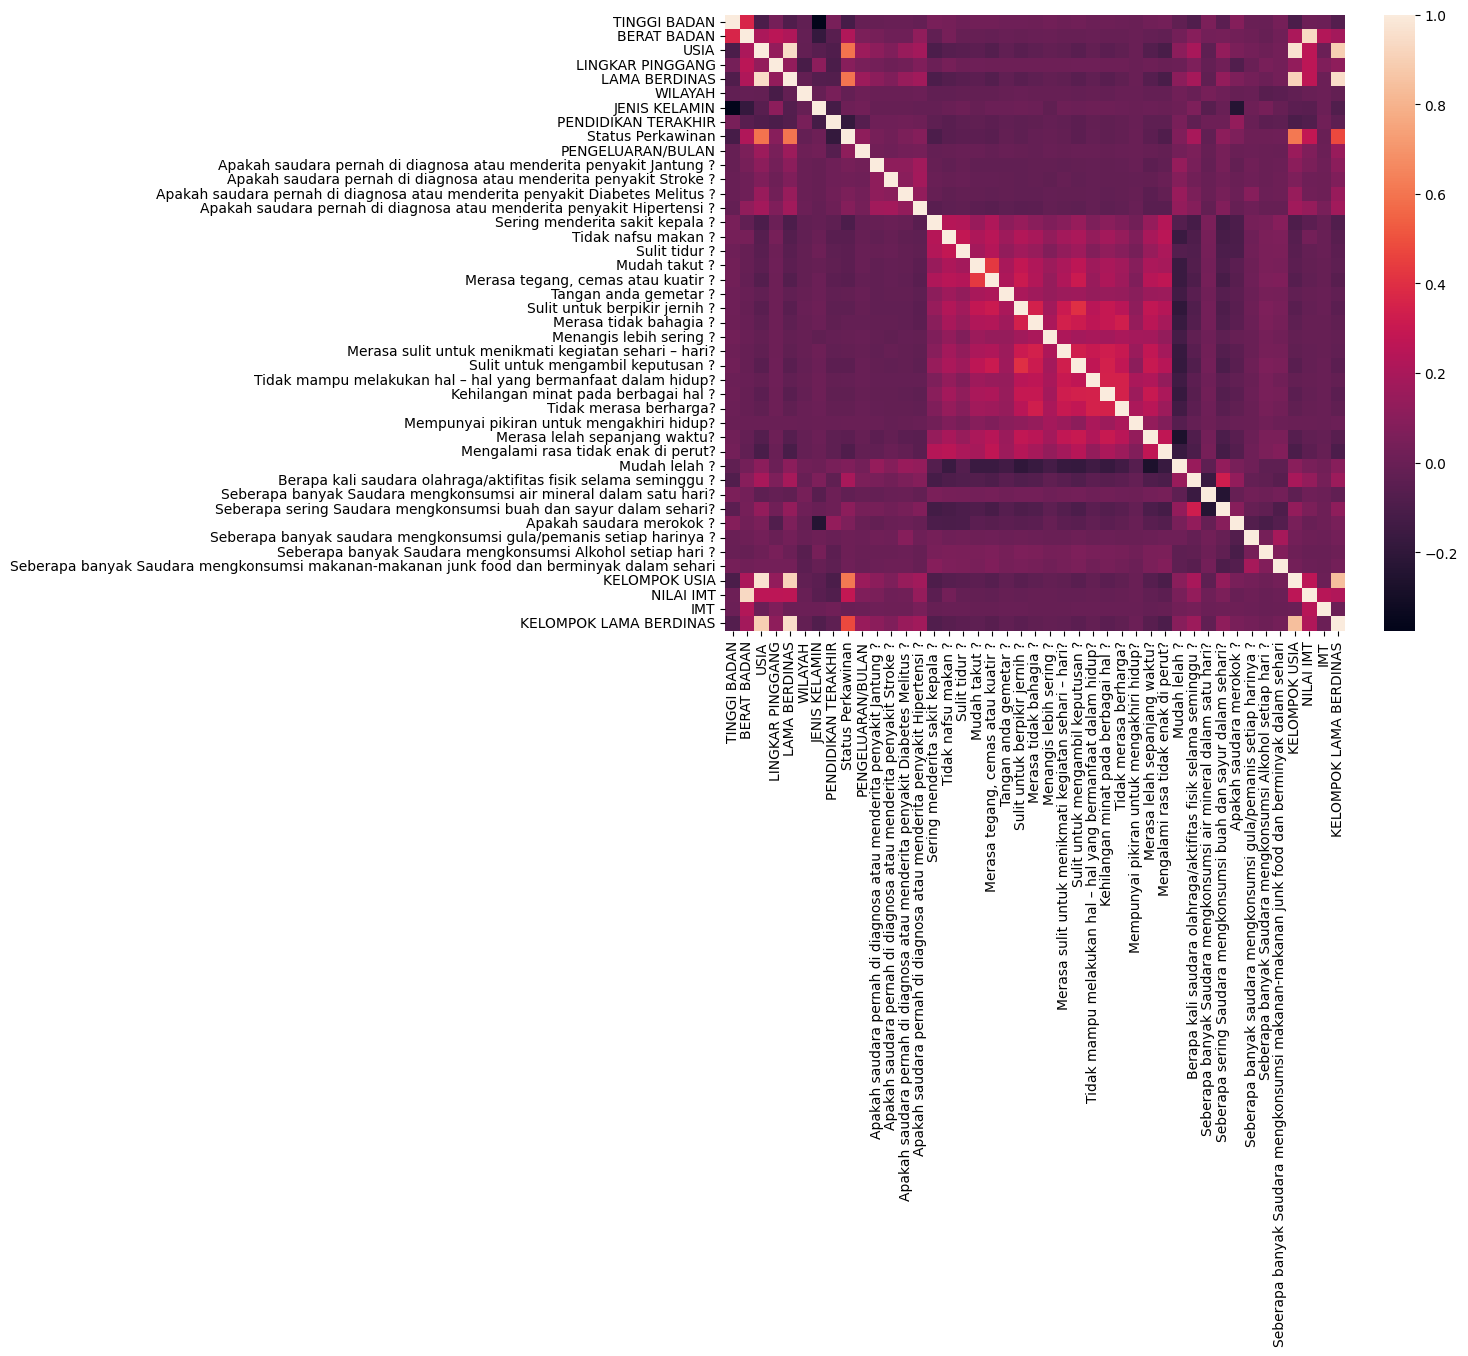

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data_clas.corr(), fmt=".2g", annot=False)

In [ ]:
X = data_clas[["USIA","JENIS KELAMIN","BERAT BADAN","TINGGI BADAN","Status Perkawinan","PENDIDIKAN TERAKHIR", "PENGELUARAN/BULAN"]]
y = data_clas["IMT"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(215836, 7) (53959, 7)


##Regression logistic

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelLR = LogisticRegression()
scoreLR = cross_val_score(modelLR, x_train, y_train, cv=5)

print(scoreLR)
print(np.mean(scoreLR))

[0.90106097 0.8984641  0.89883476 0.90008571 0.90080385]
0.8998498804134126


In [ ]:
modelLR.fit(x_train,y_train)
y_predLR_init = modelLR.predict(x_test)

In [ ]:
print("Hasil pemodelan tanpa parameter terbaik")
print(confusion_matrix(y_test,y_predLR_init),"\n")
print(classification_report(y_test,y_predLR_init))

Hasil pemodelan tanpa parameter terbaik
[[ 9912     0  1643   924     0]
 [    0    72    78     0     0]
 [ 1420    20 24694     0     0]
 [ 1221     0     0 13959     0]
 [    0    16     0     0     0]] 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     12479
           1       0.67      0.48      0.56       150
           2       0.93      0.94      0.94     26134
           3       0.94      0.92      0.93     15180
           4       0.00      0.00      0.00        16

    accuracy                           0.90     53959
   macro avg       0.67      0.63      0.64     53959
weighted avg       0.90      0.90      0.90     53959



##KNN

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

print(knn.predict(x_test))
print(knn.score(x_test, y_test))

[2 0 0 ... 0 0 0]
0.993958375803851


##Decision Tree

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Function to perform training with giniIndex.
def train_using_gini(x_train, x_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(x_train, y_train)
    return clf_gini

# Function to perform training with entropy.
def tarin_using_entropy(x_train, x_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

    # Performing training
    clf_entropy.fit(x_train, y_train)
    return clf_entropy


# Function to make predictions
def prediction(x_test, clf_object):

    # Predicton on test with giniIndex
    y_pred = clf_object.predict(x_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):

    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))

    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)

    print("Report : ",
    classification_report(y_test, y_pred))

# Driver code
def main():

    # Building Phase
    clf_gini = train_using_gini(x_train, x_test, y_train)
    clf_entropy = tarin_using_entropy(x_train, x_test, y_train)

    # Operational Phase
    print("Results Using Gini Index:")

    # Prediction using gini
    y_pred_gini = prediction(x_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)

    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(x_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)


# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[2 0 0 ... 0 0 0]
Confusion Matrix:  [[ 8996     0  1354  2129     0]
 [    0     0   150     0     0]
 [ 1421     0 24631    82     0]
 [  981     0     0 14199     0]
 [    0     0    16     0     0]]
Accuracy :  88.63396282362534
Report :                precision    recall  f1-score   support

           0       0.79      0.72      0.75     12479
           1       0.00      0.00      0.00       150
           2       0.94      0.94      0.94     26134
           3       0.87      0.94      0.90     15180
           4       0.00      0.00      0.00        16

    accuracy                           0.89     53959
   macro avg       0.52      0.52      0.52     53959
weighted avg       0.88      0.89      0.88     53959

Results Using Entropy:
Predicted values:
[2 0 0 ... 0 0 0]
Confusion Matrix:  [[ 7364     0  1354  3761     0]
 [    0     0   150     0     0]
 [ 1421     0 24631    82     0]
 [  213     0     0 14967     0]
 [    0     0 

##Naive Bayes

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(x_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy(in %): 0.7656183398506273


##Random Forest

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create regressor object
regressor = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=15,
                                       n_estimators=100, verbose=1, oob_score=True)

# fit the regressor with x and y data
regressor.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.4s finished


RandomForestRegressor(max_depth=15, n_jobs=-1, oob_score=True, random_state=42,
                      verbose=1)

In [ ]:
regressor.oob_score_

0.9997990779512886

In [ ]:
scoreRF = cross_val_score(regressor, x_train, y_train, cv=10)
print(scoreRF)
print("akurasi rata-rata : ",np.mean(scoreRF))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.3s
[Parall

[0.99996221 0.99975107 0.99987641 0.99993901 0.9997947  0.99927394
 0.99972994 0.99994871 0.99926507 0.99984284]
akurasi rata-rata :  0.999738390147934


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


In [ ]:
regressor.fit(x_train, y_train)
y_predRF_init = regressor.predict(x_test)
print(confusion_matrix(y_test,np.round(abs(y_predRF_init))),"\n")
print(classification_report(y_test,np.round(abs(y_predRF_init))))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s


[[12478     0     0     1     0]
 [    0   149     1     0     0]
 [    1     2 26131     0     0]
 [    0     0     0 15180     0]
 [    0     0     0     0    16]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12479
           1       0.99      0.99      0.99       150
           2       1.00      1.00      1.00     26134
           3       1.00      1.00      1.00     15180
           4       1.00      1.00      1.00        16

    accuracy                           1.00     53959
   macro avg       1.00      1.00      1.00     53959
weighted avg       1.00      1.00      1.00     53959



[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.4s finished


##SVM

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=1, gamma="auto", verbose=True)
SVM.fit(x_train, y_train)  # predict the labels on validation dataset

# Menggunakan metrics accuracy untuk melihat performa model
predictions_SVM = SVM.predict(x_test)
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test))

[LibSVM]SVM Accuracy Score ->  0.9971274486183954


In [ ]:
print(confusion_matrix(y_test, predictions_SVM))
print(classification_report(y_test, predictions_SVM))

[[12405     0    74     0     0]
 [    0   147     3     0     0]
 [   76     1 26057     0     0]
 [    0     0     0 15180     0]
 [    0     1     0     0    15]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12479
           1       0.99      0.98      0.98       150
           2       1.00      1.00      1.00     26134
           3       1.00      1.00      1.00     15180
           4       1.00      0.94      0.97        16

    accuracy                           1.00     53959
   macro avg       1.00      0.98      0.99     53959
weighted avg       1.00      1.00      1.00     53959



##Gradient Boost

In [ ]:
# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5)

# Fit train data to GBC

gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
print(confusion_matrix(y_test, gbc.predict(x_test)))
print("GBC accuracy is %2.2f" % accuracy_score(y_test, gbc.predict(x_test)))

[[12460     0     6    12     1]
 [    0   147     2     0     1]
 [   11     0 26123     0     0]
 [    3     0     0 15177     0]
 [    1     2     4     3     6]]
GBC accuracy is 1.00


In [ ]:
from sklearn.metrics import classification_report

pred=gbc.predict(x_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12479
           1       0.99      0.98      0.98       150
           2       1.00      1.00      1.00     26134
           3       1.00      1.00      1.00     15180
           4       0.75      0.38      0.50        16

    accuracy                           1.00     53959
   macro avg       0.95      0.87      0.90     53959
weighted avg       1.00      1.00      1.00     53959



##XGboost

In [ ]:
# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import xgboost as xgb

#adding additional parameters to reduce the chance of overfitting.
xgb_model = xgb.XGBClassifier(booster='gbtree',max_depth = 5,
learning_rate=0.1,min_child_weight = 6, subsample = 0.5,n_estimators = 200,cv=5,
                              gamma=0, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


##LightGBM

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 215836, number of used features: 7
[LightGBM] [Info] Start training from score -1.446485
[LightGBM] [Info] Start training from score -5.805302
[LightGBM] [Info] Start training from score -0.732438
[LightGBM] [Info] Start training from score -1.271611
[LightGBM] [Info] Start training from score -7.647545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

##Catboost

In [ ]:
# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters for the CatBoost algorithm
params = {'learning_rate': 0.1, 'depth': 6,
          'l2_leaf_reg': 3, 'iterations': 100}

# Initialize the CatBoostClassifier object
# with the defined hyperparameters and fit it on the training set
model = CatBoostClassifier(**params)
model.fit(x_train, y_train)

# Predict the target variable on the validation
# set and evaluate the performance
y_pred = model.predict(x_test)
accuracy = (y_pred == np.array(y_test)).mean()
print("Validation Accuracy:", accuracy)

0:	learn: 1.2964893	total: 210ms	remaining: 20.8s
1:	learn: 1.1006448	total: 344ms	remaining: 16.8s
2:	learn: 0.9541130	total: 481ms	remaining: 15.6s
3:	learn: 0.8442134	total: 615ms	remaining: 14.8s
4:	learn: 0.7534750	total: 748ms	remaining: 14.2s
5:	learn: 0.6787079	total: 882ms	remaining: 13.8s
6:	learn: 0.6125420	total: 1.02s	remaining: 13.6s
7:	learn: 0.5580518	total: 1.16s	remaining: 13.3s
8:	learn: 0.5108953	total: 1.29s	remaining: 13s
9:	learn: 0.4699616	total: 1.42s	remaining: 12.8s
10:	learn: 0.4350792	total: 1.55s	remaining: 12.6s
11:	learn: 0.4042845	total: 1.68s	remaining: 12.3s
12:	learn: 0.3748327	total: 1.81s	remaining: 12.1s
13:	learn: 0.3489997	total: 1.96s	remaining: 12s
14:	learn: 0.3255879	total: 2.09s	remaining: 11.8s
15:	learn: 0.3055260	total: 2.22s	remaining: 11.7s
16:	learn: 0.2870842	total: 2.35s	remaining: 11.5s
17:	learn: 0.2706020	total: 2.48s	remaining: 11.3s
18:	learn: 0.2544640	total: 2.61s	remaining: 11.1s
19:	learn: 0.2413379	total: 2.74s	remaining: 

##Adaboost

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adr = AdaBoostRegressor()
adr.fit(x_train, y_train)
y_pred3 = adr.predict(x_test)
print("AdaBoost - R2: ", r2_score(y_test, y_pred3))

AdaBoost - R2:  0.27369929968563045


Berdasarkan seluruh hasil di atas, maka dapat dibuat tabel ringkasan mengenai akurasi dari model-model yang telah dibuat sebagai berikut:

In [ ]:
from tabulate import tabulate
data1 = [["Regresi Logistik", 90],
        ["KNN", 99],
        ["Decision Tree (Gini)",89 ],
        ["Decision Tree (Entropy)", 87],
        ["Naive Bayes",79 ],
        ["Random Forest", 100],
        ["SVM",100 ],
        ['Gradient Boost', 100],
        ["XGBoost", 100],
        ["LightGBM",97],
        ["CatBoost", 37],
        ['AdaBoost',43]]

#define header names
col_names = ['Model', 'Akurasi (%)']

#display table
print(tabulate(data1, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════════╤═══════════════╕
│ Model                   │   Akurasi (%) │
╞═════════════════════════╪═══════════════╡
│ Regresi Logistik        │            90 │
├─────────────────────────┼───────────────┤
│ KNN                     │            99 │
├─────────────────────────┼───────────────┤
│ Decision Tree (Gini)    │            89 │
├─────────────────────────┼───────────────┤
│ Decision Tree (Entropy) │            87 │
├─────────────────────────┼───────────────┤
│ Naive Bayes             │            79 │
├─────────────────────────┼───────────────┤
│ Random Forest           │           100 │
├─────────────────────────┼───────────────┤
│ SVM                     │           100 │
├─────────────────────────┼───────────────┤
│ Gradient Boost          │           100 │
├─────────────────────────┼───────────────┤
│ XGBoost                 │           100 │
├─────────────────────────┼───────────────┤
│ LightGBM                │            97 │
├─────────────────────────┼─────

##Kontribusi Tinggi Badan, Berat Badan, Usia, Jenis Kelamin, dan Status Perkawinan Terhadap Obesitas

In [ ]:
#Membuat Data Frame baru yang berisikan Tinggi Badan, Berat Badan, Usia, Jenis Kelamin, Status Perkawinan dan Indeks Massa Tubuh (IMT)
selected_columns = ['TINGGI BADAN', 'BERAT BADAN', 'USIA', 'JENIS KELAMIN','Status Perkawinan', 'IMT']
data_klasifikasi_obesitas = data_clas[selected_columns].copy()
data_klasifikasi_obesitas

,TINGGI BADAN,BERAT BADAN,USIA,JENIS KELAMIN,Status Perkawinan,IMT
0,168.9,85.0,34,0,3,3
1,169.5,70.0,43,0,3,2
2,169.5,60.0,21,0,0,2
3,166.8,80.0,40,0,3,3
4,164.5,62.0,28,0,3,2
...,...,...,...,...,...,...
289794,169.0,60.0,46,0,3,2
289795,169.0,60.0,53,0,3,2
289796,169.0,60.0,23,0,3,2
289799,179.0,55.0,35,0,3,1


In [ ]:
#Split Data Menjadi Variabel Prediktor (X) dan Variabel Respon (Y)
X = data_klasifikasi_obesitas.drop('IMT', axis=1)
Y = data_klasifikasi_obesitas['IMT']

#Split Data Menjadi Data Training dan Data Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, len(Y_test))

(215836, 5) (53959, 5) 53959


In [ ]:
#Inisialisasi Model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
Y_rf = rf_model.predict(X_test)

In [ ]:
#Evaluasi Kinerja Model
print('Akurasi = ', accuracy_score(Y_test, Y_rf))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_rf))
print("Classification Report:\n", classification_report(Y_test, Y_rf))

Akurasi =  0.9997590763357364
Confusion Matrix:
 [[12476     0     0     3     0]
 [    0   145     5     0     0]
 [    2     0 26132     0     0]
 [    0     0     0 15180     0]
 [    0     3     0     0    13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12479
           1       0.98      0.97      0.97       150
           2       1.00      1.00      1.00     26134
           3       1.00      1.00      1.00     15180
           4       1.00      0.81      0.90        16

    accuracy                           1.00     53959
   macro avg       1.00      0.96      0.97     53959
weighted avg       1.00      1.00      1.00     53959



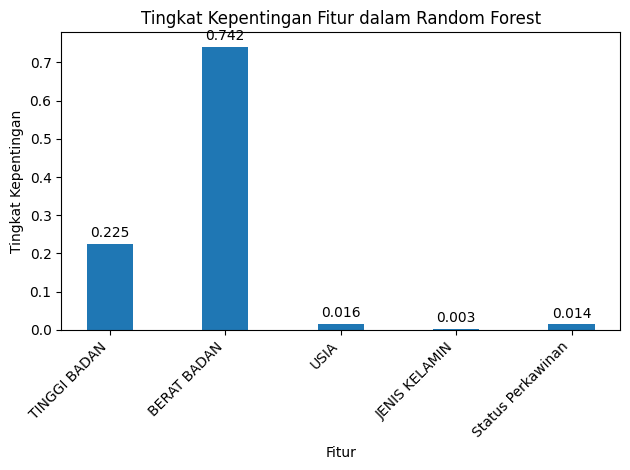

In [ ]:
#Variabel Prediktor (X) yang Paling Penting
#feature_importances = rf_model.feature_importances_

#bar_width = 0.4
#bar_positions = np.arange(len(feature_importances))
#plt.bar(bar_positions, feature_importances, width=bar_width, tick_label=X_train.columns)

#for index, value in enumerate(feature_importances):
    #plt.text(index, value + 0.01, round(value, 3), ha='center', va='bottom')

#plt.xlabel('Fitur')
#plt.ylabel('Tingkat Kepentingan')
#plt.title('Tingkat Kepentingan Fitur dalam Random Forest')

#plt.xticks(bar_positions, X_train.columns, rotation=45, ha='right')
#plt.tight_layout()
#plt.show()

#Menampilkan Visualisasi Tingkat Kepentingan Fitur dalam Random Forest
from IPython.display import Image, display
import requests
image_url = "https://github.com/SelviraSalsabila/UAS-Data-Mining/blob/06ad4b9dadda3c944abd94dd8cdfab9b2b09a6f6/Tingkat%20Kepentingan%20Fitur%20Random%20Forest.png?raw=true"
display(Image(requests.get(image_url).content))

Berdasarkan plot di atas, diperoleh informasi bahwa **Berat Badan sangat memengaruhi obesitas,** yaitu sekitar **74.2%**, **Tinggi Badan** memengaruhi obesitas sekitar **22.5%**, **Usia** memengaruhi obesitas sekitar **1.6%**, **Status Perkawinan** memengaruhi obesitas sekitar **1.4%**, **Jenis Kelamin** memengaruhi obesitas sekitar **0.3%.**

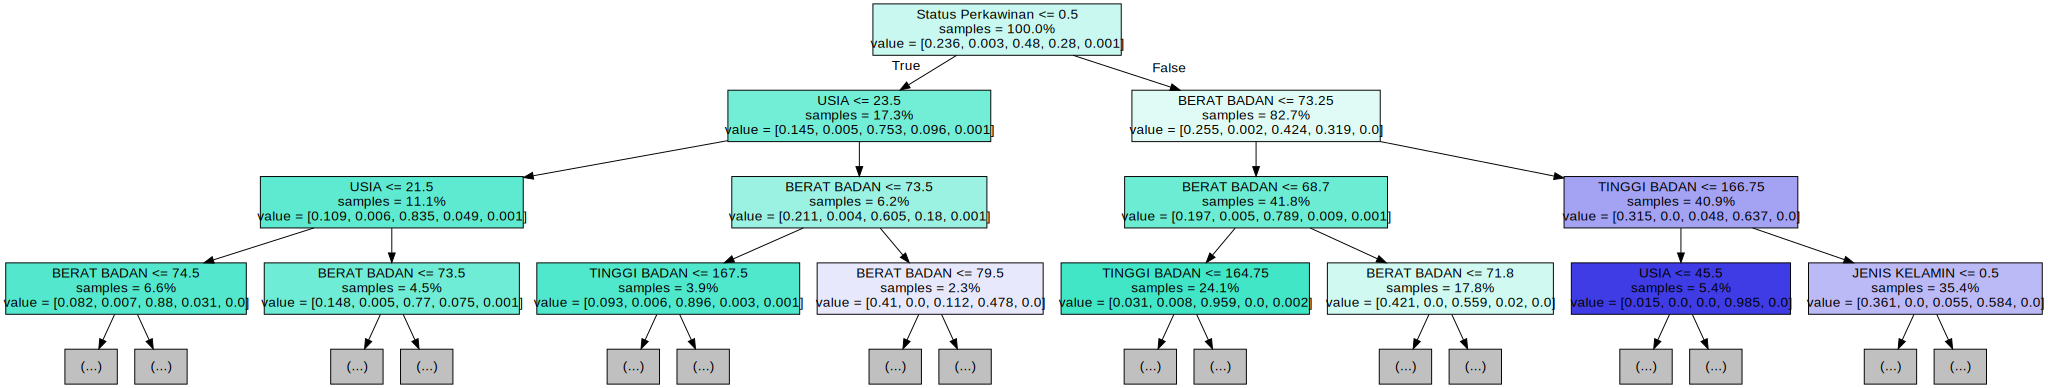

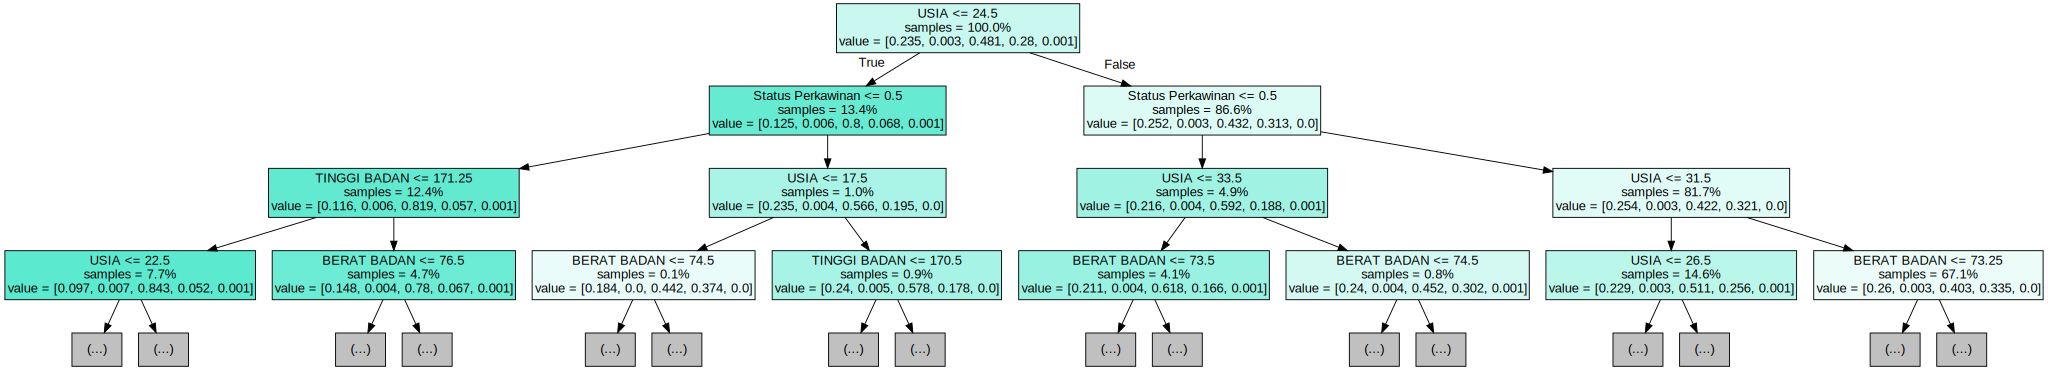

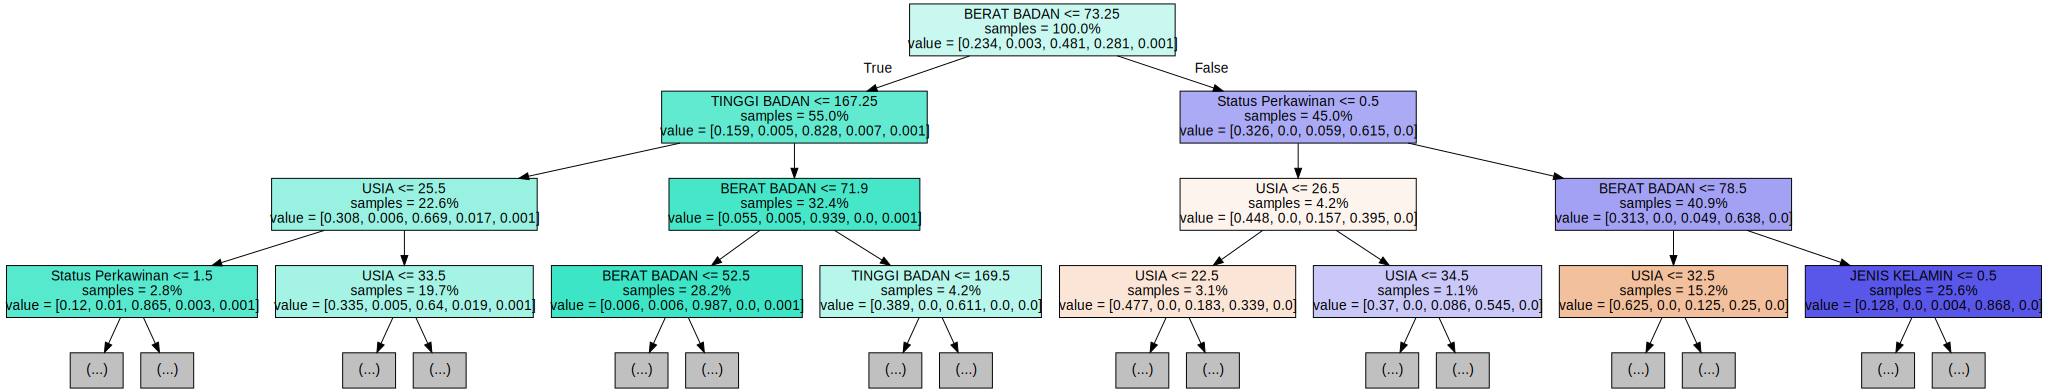

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

#Export 3 Decision Tree dari model Random Forest
for i in range(3):
    tree = rf_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=3,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

##Hubungan Obesitas dengan Penyakit Stroke, Jantung, Diabetes Melitus, dan Hipertensi

In [ ]:
#Membuat Data Frame baru yang berisikan Indeks Masa Tubuh, Jantung, Stroke, Jantung, Diabetes Melitus, dan Hipertensi
selected_columns2 = ['Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?',
                     'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?',
                     'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?',
                     'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?',
                     'IMT']
data_obesitas_penyakit = data_combined[selected_columns2].copy()
data_obesitas_penyakit = data_obesitas_penyakit.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?': 'Jantung',
                                                                      'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?': 'Stroke',
                                                                      'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?':'DM',
                                                                      'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?':'Hipertensi'})
data_obesitas_penyakit

,Jantung,Stroke,DM,Hipertensi,IMT
0,Tidak,Tidak,Tidak,Tidak,Obesitas
1,Tidak,Tidak,Tidak,Tidak,Normal
2,Tidak,Tidak,Tidak,Tidak,Normal
3,Tidak,Tidak,Tidak,Tidak,Obesitas
4,Tidak,Tidak,Tidak,Tidak,Normal
...,...,...,...,...,...
289794,Tidak,Tidak,Tidak,Tidak,Normal
289795,Tidak,Tidak,Tidak,Tidak,Normal
289796,Tidak,Tidak,Tidak,Tidak,Normal
289799,Tidak,Tidak,Tidak,Tidak,Kurus


In [ ]:
data_obesitas_penyakit['IMT_Biner'] = data_obesitas_penyakit['IMT'].map({'Obesitas': 1, 'Normal': 0, 'Gemuk': 0, 'Kurus': 0, 'Sangat Kurus': 0})
data_obesitas_penyakit['Jantung_Biner'] = data_obesitas_penyakit['Jantung'].map({'Ya': 1, 'Tidak': 0})
data_obesitas_penyakit['Stroke_Biner'] = data_obesitas_penyakit['Stroke'].map({'Ya': 1, 'Tidak': 0})
data_obesitas_penyakit['DM_Biner'] = data_obesitas_penyakit['DM'].map({'Ya': 1, 'Tidak': 0})
data_obesitas_penyakit['Hipertensi_Biner'] = data_obesitas_penyakit['Hipertensi'].map({'Ya': 1, 'Tidak': 0})

data_obesitas_penyakit = data_obesitas_penyakit.drop(columns=['IMT', 'Jantung', 'Stroke', 'DM', 'Hipertensi'])
data_obesitas_penyakit

,IMT_Biner,Jantung_Biner,Stroke_Biner,DM_Biner,Hipertensi_Biner
0,1,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
289794,0,0,0,0,0
289795,0,0,0,0,0
289796,0,0,0,0,0
289799,0,0,0,0,0


In [ ]:
# Pisahkan variabel independen (X) dan dependen (Y)
X = data_obesitas_penyakit.drop('IMT_Biner', axis=1)
y = data_obesitas_penyakit['IMT_Biner']

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, len(Y_test))

(215836, 4) (53959, 4) 53959


In [ ]:
# Inisialisasi model regresi logistik
logreg_model = LogisticRegression()

# Melatih model dengan data train
logreg_model.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred = logreg_model.predict(X_test)

# Evaluasi model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.718267573528049
Confusion Matrix:
 [[37483  1296]
 [13906  1274]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.97      0.83     38779
           1       0.50      0.08      0.14     15180

    accuracy                           0.72     53959
   macro avg       0.61      0.53      0.49     53959
weighted avg       0.66      0.72      0.64     53959



Berdasarkan output di atas, diperoleh informasi bahwa
1. Akurasi = 0.718267573528049.
Hal ini berarti sekitar **71.82% dari semua prediksi yang dibuat oleh model adalah benar.**
2. Jumlah orang yang **tidak obesitas diprediksi benar** sebanyak **37483** orang.
3. Jumlah orang yang **tidak obesitas** dan **salah prediksi sebagai obesitas** sebanyak **1296** orang.
4. Jumlah orang yang **obesitas** dan **salah prediksi sebagai tidak obesitas** sebanyak **13906** orang.
5. jumlah orang yang **obesitas diprediksi benar** sebanyak **1274** orang.

In [ ]:
print("Intercept Model:", logreg_model.intercept_)
print("Koefisien Model:", logreg_model.coef_)
odds_ratio = np.exp(logreg_model.coef_)
print("Odds Ratio:", odds_ratio)

Intercept Model: [-1.00608111]
Koefisien Model: [[ 0.39767038 -0.25913835 -0.00123403  1.01827954]]
Odds Ratio: [[1.48835336 0.77171625 0.99876673 2.76842769]]


Berdasarkan output di atas, diperoleh informasi bahwa :

1. Jika **seseorang pernah menderita/diagnosa penyakit jantung,** maka odds ratio seseorang akan obesitas akan **lebih tinggi sebesar 1.48** dibandingkan seseorang yang tidak pernah mengalami/diagnosa penyakit jantung.
2.  Jika **seseorang pernah menderita/diagnosa penyakit stroke,** maka odds ratio seseorang akan obesitas akan **lebih tinggi sebesar 0.77** dibandingkan seseorang yang tidak pernah mengalami/diagnosa penyakit stroke.
3.  Jika seseorang **pernah menderita/diagnosa penyakit diabetes melitus,** maka odds ratio seseorang akan obesitas akan **lebih tinggi sebesar 0.99** dibandingkan seseorang yang tidak pernah mengalami/diagnosa penyakit diabetes melitus.
4.  Jika seseorang **pernah menderita/diagnosa penyakit hipertensi,** maka odds ratio seseorang akan obesitas akan **lebih tinggi sebesar 2.76** dibandingkan seseorang yang tidak pernah mengalami/diagnosa penyakit hipertensi.

##Hubungan Tingkat Pendidikan terhadap Pilihan Gaya Hidup dan Kesehatan

In [ ]:
for col in data_clas.select_dtypes(include = ["object"]).columns:
  print(f"{col} : {data_clas[col].unique()}")

In [ ]:
for col in data_clas.select_dtypes(include = ["object"]).columns:
  label_encoder = preprocessing.LabelEncoder()
  label_encoder.fit(data_clas[col].unique())
  data_clas[col] = label_encoder.transform(data_clas[col])
  print(f"{col} : {data_clas[col].unique()}")

In [ ]:
corr_matrix = data_clas.corr()
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
unique_sorted_pairs = sorted_pairs[sorted_pairs < 1]
print(unique_sorted_pairs)

USIA                           KELOMPOK USIA                    0.963124
KELOMPOK USIA                  USIA                             0.963124
KELOMPOK LAMA BERDINAS         LAMA BERDINAS                    0.946921
LAMA BERDINAS                  KELOMPOK LAMA BERDINAS           0.946921
                               USIA                             0.942402
                                                                  ...   
Apakah saudara merokok ?       JENIS KELAMIN                   -0.236386
Merasa lelah sepanjang waktu?  Mudah lelah ?                   -0.267662
Mudah lelah ?                  Merasa lelah sepanjang waktu?   -0.267662
TINGGI BADAN                   JENIS KELAMIN                   -0.375056
JENIS KELAMIN                  TINGGI BADAN                    -0.375056
Length: 1806, dtype: float64


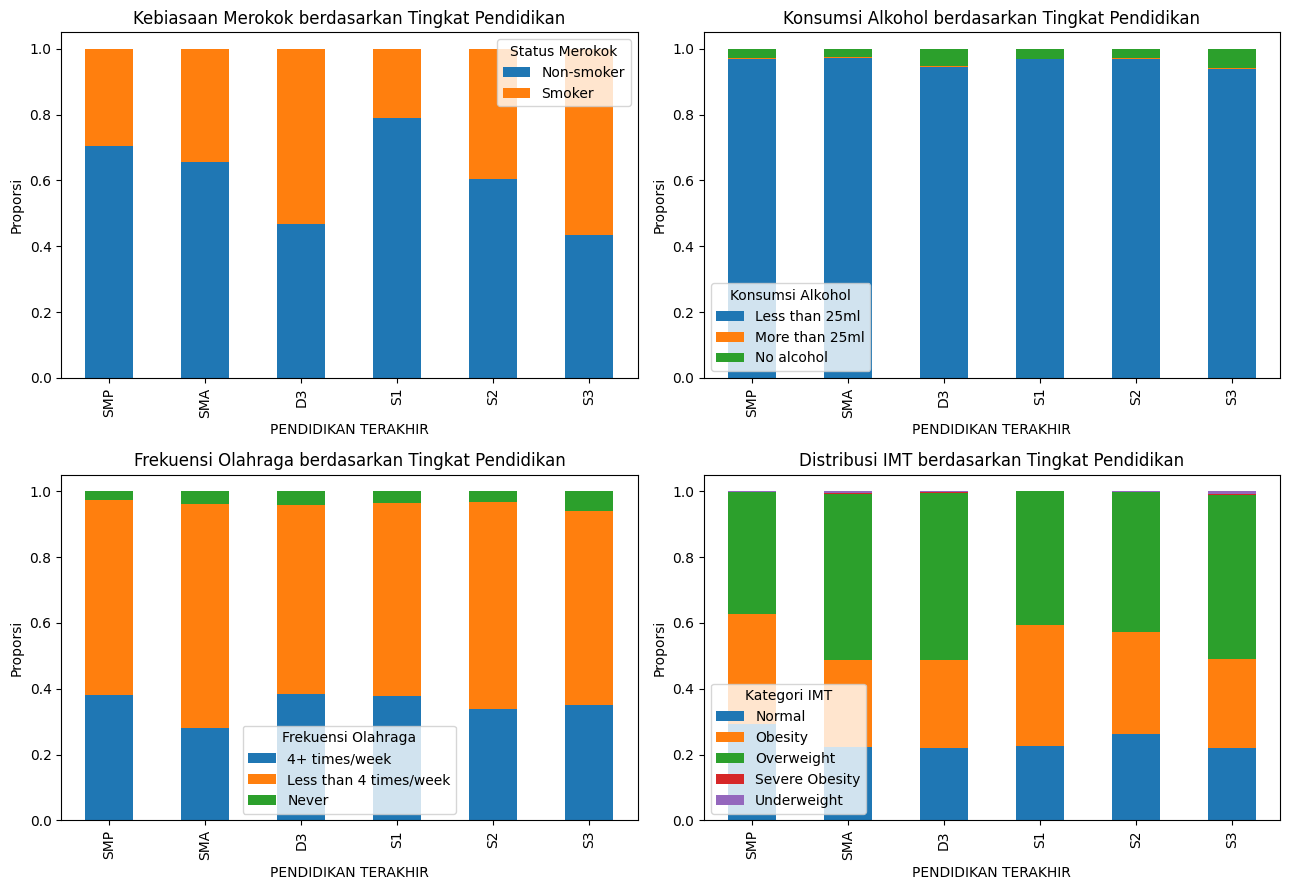

In [ ]:
education_order = ['SMP', 'SMA', 'D3', 'S1', 'S2', 'S3']
education_mapping = {2: 'SMP', 0: 'SMA', 4: 'D3', 3: 'S1', 1: 'S2', 5: 'S3'}
smoking_mapping = {0: 'Non-smoker', 1: 'Smoker'}
alcohol_mapping = {0: 'No alcohol', 1: 'Less than 25ml', 2: 'More than 25ml'}
exercise_mapping = {0: '4+ times/week', 1: 'Less than 4 times/week', 2: 'Never'}
IMT_mapping = {0: 'Normal', 1: 'Underweight', 2: 'Overweight', 3: 'Obesity', 4: 'Severe Obesity'}

data_clas['PENDIDIKAN TERAKHIR'] = data_clas['PENDIDIKAN TERAKHIR'].map(education_mapping)
data_clas['Apakah saudara merokok ?'] = data_clas['Apakah saudara merokok ?'].map(smoking_mapping)
data_clas['Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?'] = data_clas['Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?'].map(alcohol_mapping)
data_clas['Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?'] = data_clas['Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?'].map(exercise_mapping)
data_clas['IMT'] = data_clas['IMT'].map(IMT_mapping)

data_clas['PENDIDIKAN TERAKHIR'] = pd.Categorical(data_clas['PENDIDIKAN TERAKHIR'], categories=education_order, ordered=True)
data_clas.sort_values('PENDIDIKAN TERAKHIR', inplace=True)

grouped_data = data_clas.groupby('PENDIDIKAN TERAKHIR')

smoking_analysis = grouped_data['Apakah saudara merokok ?'].value_counts(normalize=True).unstack().reindex(education_order)
alcohol_analysis = grouped_data['Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?'].value_counts(normalize=True).unstack().reindex(education_order)
exercise_analysis = grouped_data['Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?'].value_counts(normalize=True).unstack().reindex(education_order)

IMT_analysis = grouped_data['IMT'].value_counts(normalize=True).unstack().reindex(education_order)

fig, axes = plt.subplots(2, 2, figsize=(13, 9))

smoking_analysis.plot(kind='bar', ax=axes[0, 0], stacked=True)
axes[0, 0].set_title('Kebiasaan Merokok berdasarkan Tingkat Pendidikan')
axes[0, 0].set_ylabel('Proporsi')
axes[0, 0].legend(title='Status Merokok')

alcohol_analysis.plot(kind='bar', ax=axes[0, 1], stacked=True)
axes[0, 1].set_title('Konsumsi Alkohol berdasarkan Tingkat Pendidikan')
axes[0, 1].set_ylabel('Proporsi')
axes[0, 1].legend(title='Konsumsi Alkohol')

exercise_analysis.plot(kind='bar', ax=axes[1, 0], stacked=True)
axes[1, 0].set_title('Frekuensi Olahraga berdasarkan Tingkat Pendidikan')
axes[1, 0].set_ylabel('Proporsi')
axes[1, 0].legend(title='Frekuensi Olahraga')

IMT_analysis.plot(kind='bar', ax=axes[1, 1], stacked=True)
axes[1, 1].set_title('Distribusi IMT berdasarkan Tingkat Pendidikan')
axes[1, 1].set_ylabel('Proporsi')
axes[1, 1].legend(title='Kategori IMT')

plt.tight_layout()
plt.show()

Berdasarkan output diatas, diperoleh informasi bahwa pengaruh Tingkat Pendidikan Terakhir (PENDIDIKAN TERAKHIR) mempengaruhi Pilihan Gaya Hidup (Kebiasaan Merokok, Konsumsi Alkohol, Frekuensi Berolahraga) dan Hasil Kesehatan (IMT) namun tidak terlalu signifikan.

#Visualisasi Data

In [ ]:
df = data_combined

##Data Demografis

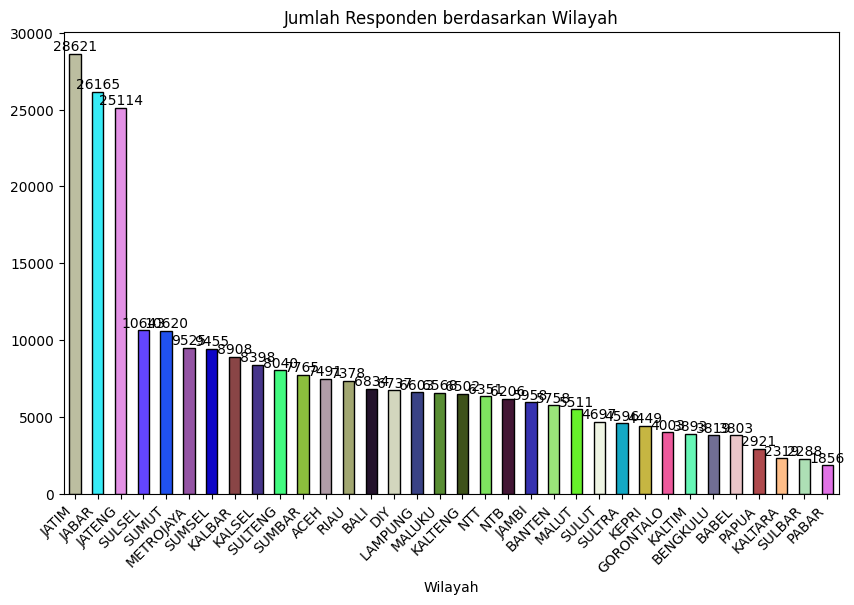

In [ ]:
# Wilayah
dfwc = df['WILAYAH'].value_counts()

def plot_colorful_bar(dfwc, figsize=(10, 6)):
    num_bars = len(dfwc)
    colors = []

    for _ in range(num_bars):
        # Generate random RGB values
        r = random.uniform(0, 1)
        g = random.uniform(0, 1)
        b = random.uniform(0, 1)
        colors.append((r, g, b))

    # Plotting
    dfwc.plot(kind='bar', figsize=figsize, color=colors, edgecolor='black')
    plt.title('Jumlah Responden berdasarkan Wilayah')
    plt.xlabel('Wilayah')
    plt.xticks(rotation=45, ha='right')

    # Labels
    for index, value in enumerate(dfwc):
        plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

    plt.show()

# Plotting
plot_colorful_bar(dfwc)

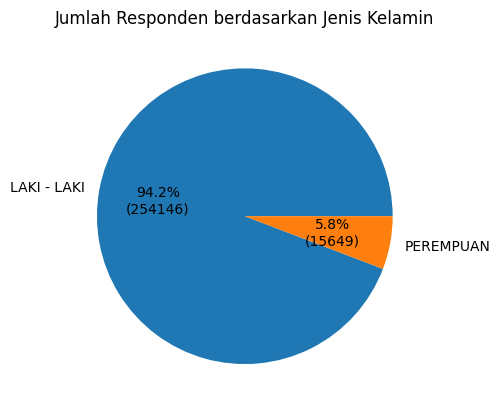

In [ ]:
#Jenis Kelamin
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.pie(df['JENIS KELAMIN'].value_counts(),labels = ['LAKI - LAKI', 'PEREMPUAN'], autopct=autopct_format(df['JENIS KELAMIN'].value_counts()))
plt.title('Jumlah Responden berdasarkan Jenis Kelamin')
plt.show()

In [ ]:
#Kelompok Usia
age_counts = df['KELOMPOK USIA'].value_counts().reset_index()
age_counts.columns = ['Kelompok Usia', 'Jumlah']
# Membuat pie chart dengan Plotly
fig = px.pie(age_counts, values='Jumlah', names='Kelompok Usia', title='Jumlah Responden berdasarkan Kelompok Usia')
fig.update_layout(
    title_text='Jumlah Responden berdasarkan Kelompok Usia',
    title_x=0.5,
    title_y=0.95
    )
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
fig.show()

In [ ]:
#Lama Berdinas
time_counts = df['KELOMPOK LAMA BERDINAS'].value_counts().reset_index()
time_counts.columns = ['Lama Berdinas', 'Jumlah']
# Membuat pie chart dengan Plotly
fig = px.pie(time_counts, values='Jumlah', names='Lama Berdinas', title='Jumlah Responden berdasarkan Lama Berdinas')
fig.update_layout(
    title_text='Jumlah Responden berdasarkan Lama Berdinas',
    title_x=0.5,
    title_y=0.95
    )
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
fig.show()

In [ ]:
#Pendidikan
study_counts = df['PENDIDIKAN TERAKHIR'].value_counts().reset_index()
study_counts.columns = ['Pendidikan Terakhir', 'Jumlah']
# Membuat pie chart dengan Plotly
fig = px.pie(study_counts, values='Jumlah', names='Pendidikan Terakhir', title='Jumlah Responden berdasarkan Pendidikan Terakhir')
fig.update_layout(
    title_text='Jumlah Responden berdasarkan Pendidikan Terakhir',
    title_x=0.5,
    title_y=0.95
    )
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
fig.show()

In [ ]:
#Status Perkawinan
marry_counts = df['Status Perkawinan'].value_counts().reset_index()
marry_counts.columns = ['Status Perkawinan', 'Jumlah']
# Membuat pie chart dengan Plotly
fig = px.pie(marry_counts, values='Jumlah', names='Status Perkawinan', title='Jumlah Responden berdasarkan Status Perkawinan')
fig.update_layout(
    title_text='Jumlah Responden berdasarkan Status Perkawinan',
    title_x=0.5,
    title_y=0.95
    )
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
fig.show()

In [ ]:
#Pengeluaran Per Bulan
spent_counts = df['PENGELUARAN/BULAN'].value_counts().reset_index()
spent_counts.columns = ['Pengeluaran Bulanan', 'Jumlah']
# Membuat pie chart dengan Plotly
fig = px.pie(spent_counts, values='Jumlah', names='Pengeluaran Bulanan', title='Jumlah Responden berdasarkan Pengeluaran Bulanan')
fig.update_layout(
    title_text='Jumlah Responden berdasarkan Pengeluaran Bulanan',
    title_x=0.5,
    title_y=0.95
    )
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
fig.show()

## EDA

####Kecendurungan Konsumsi Makanan dan Minuman Tidak Sehat

In [ ]:
df['gula'] = df['Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?']
df['alkohol'] = df['Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?']
df['junk'] = df['Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari']

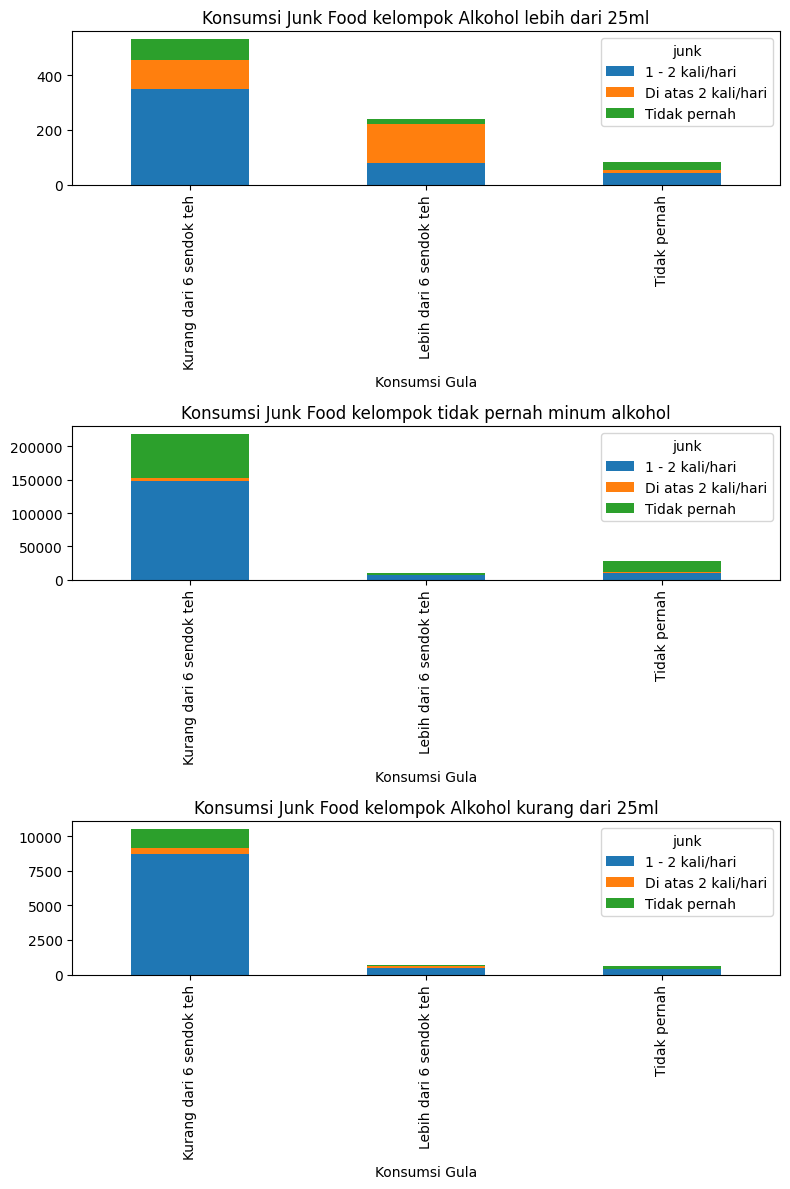

In [ ]:
lebih = df[df['alkohol'] == 'lebih dari 25ml']
lebihh = pd.crosstab(index=lebih['gula'], columns=lebih['junk'])

tidak = df[df['alkohol'] == 'Tidak pernah']
tidakk = pd.crosstab(index=tidak['gula'], columns=tidak['junk'])

kurang = df[df['alkohol'] == 'Kurang dari 25ml']
kurangg = pd.crosstab(index=kurang['gula'], columns=kurang['junk'])

# Membuat figure dan axes
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot untuk lebih dari 25 ml
lebihh.plot(kind="bar", stacked=True, ax=axs[0])
axs[0].set_title('Konsumsi Junk Food kelompok Alkohol lebih dari 25ml')
axs[0].set_xlabel('Konsumsi Gula')

# Plot untuk Tidak pernah
tidakk.plot(kind="bar", stacked=True, ax=axs[1])
axs[1].set_title('Konsumsi Junk Food kelompok tidak pernah minum alkohol')
axs[1].set_xlabel('Konsumsi Gula')

# Plot untuk kurang dari 25 ml
kurangg.plot(kind="bar", stacked=True, ax=axs[2])
axs[2].set_title('Konsumsi Junk Food kelompok Alkohol kurang dari 25ml')
axs[2].set_xlabel('Konsumsi Gula')

# Mengatur tata letak (layout)
plt.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan visualisasi diatas, dapat dilihat bahwa terdapat kecendurungan bahwa proporsi yang mengonsumsi **Alkohol lebih dari 25ml, konsumsi junk food dan gulanya lebih banyak** ketimbang yang mengonsumsi alkohol kurang dari 25ml dan tidak pernah.

####Pola Pengeluaran per bulan berdasarkan Jenis Kelamin dan Status Perkawinan.

In [ ]:
#Laki laki
laki = data_combined[data_combined['JENIS KELAMIN'] == 'LAKI - LAKI']

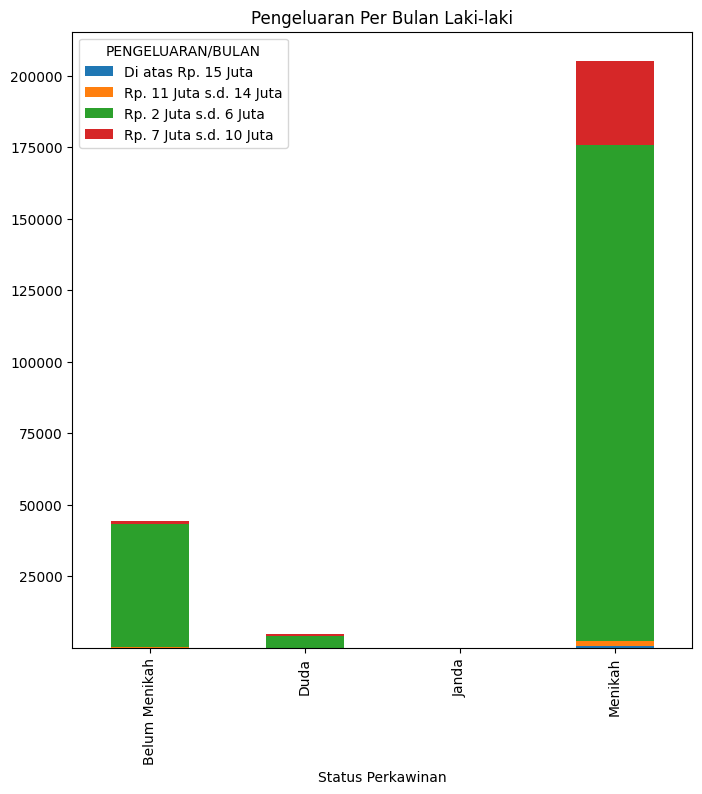

In [ ]:
lakii = pd.crosstab(index=laki['Status Perkawinan'], columns=laki['PENGELUARAN/BULAN'])
plot = lakii.plot(kind="bar", figsize=(8,8), stacked=True, title='Pengeluaran Per Bulan Laki-laki', xlabel='Status Perkawinan')

In [ ]:
#Perempuan
pere = data_combined[data_combined['JENIS KELAMIN'] == 'PEREMPUAN']

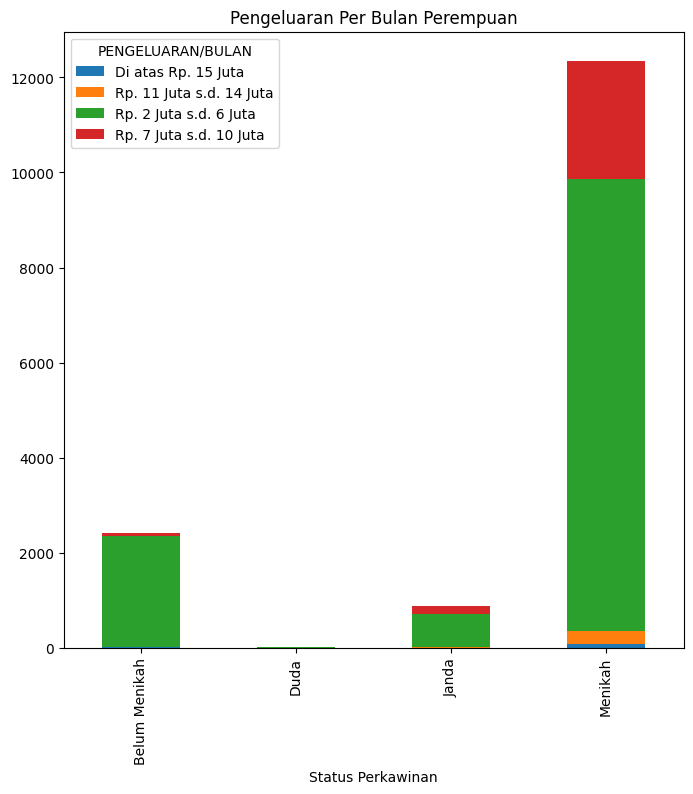

In [ ]:
peree = pd.crosstab(index=pere['Status Perkawinan'], columns=pere['PENGELUARAN/BULAN'])
plot = peree.plot(kind="bar", figsize=(8,8), stacked=True, title='Pengeluaran Per Bulan Perempuan', xlabel='Status Perkawinan')

Berdasarkan plot, dapat dilihat bahwa terdapat kecendurungan bahwa seseorang yang **menikah pengeluaran per bulannya lebih besar ketimbang yang belum menikah, janda, dan duda**

####Perbedaan Kondisi Kesehatan Berdasarkan Status Pernikahan

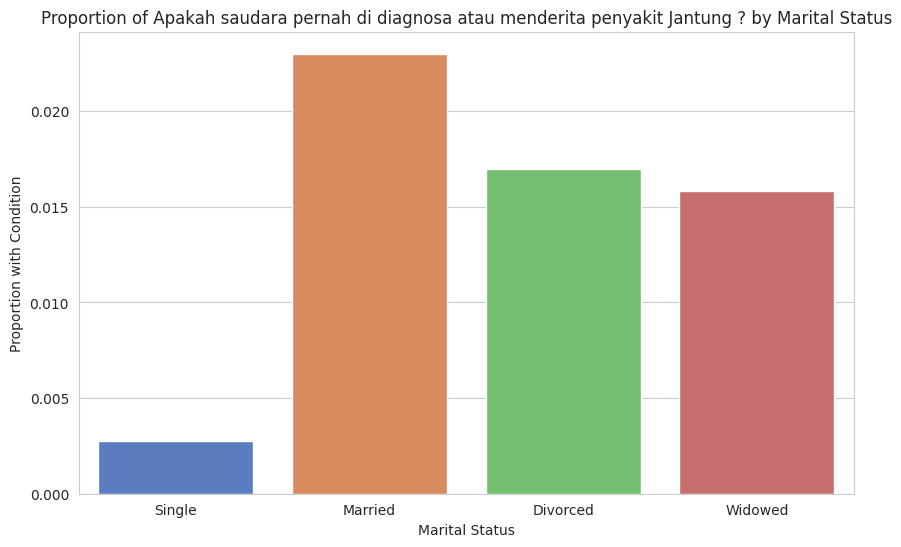

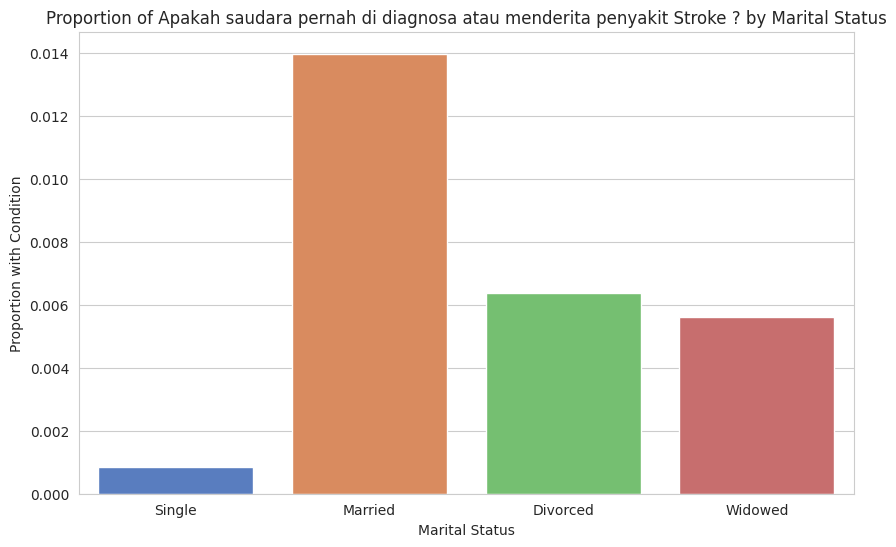

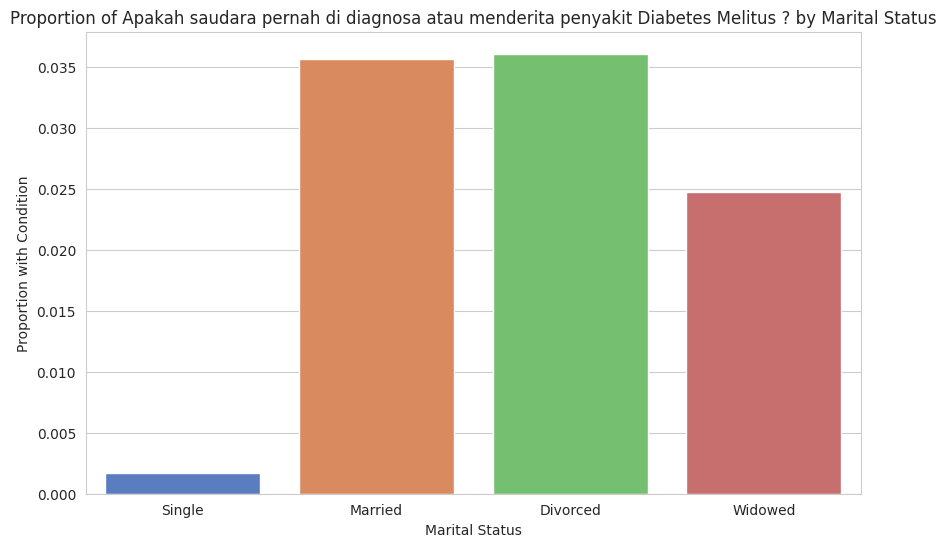

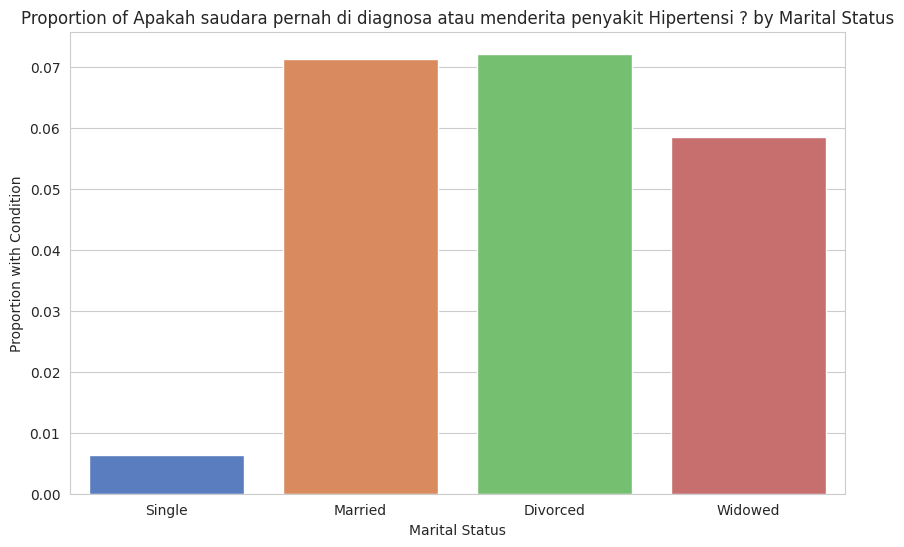

In [ ]:
health_conditions = [
    'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?']

sns.set_style("whitegrid")

for condition in health_conditions:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x='Status Perkawinan',
        y=condition,
        data=data_clas,
        estimator=np.mean,
        ci=None,
        palette='muted'
)
    ax.set_xticklabels(['Single', 'Married', 'Divorced', 'Widowed'])
    ax.set_xlabel('Marital Status')
    ax.set_ylabel('Proportion with Condition')
    ax.set_title(f'Proportion of {condition} by Marital Status')
    plt.show()

Berdasarkan plot, dapat dilihat bahwa terdapat kecendurungan bahwa seseorang yang **Belum Menikah** sangat jarang memiliki riwayat penyakit seperti penyakit Jantung, Stroke, Diabetes Mellitus, dan Hipertensi jika dibandingkan dengan seseorang dengan status **Menikah dan Pernah Menikah (Divorced & Widowed)**.

####Frekuensi Olahraga berdasarkan Jenis Kelamin

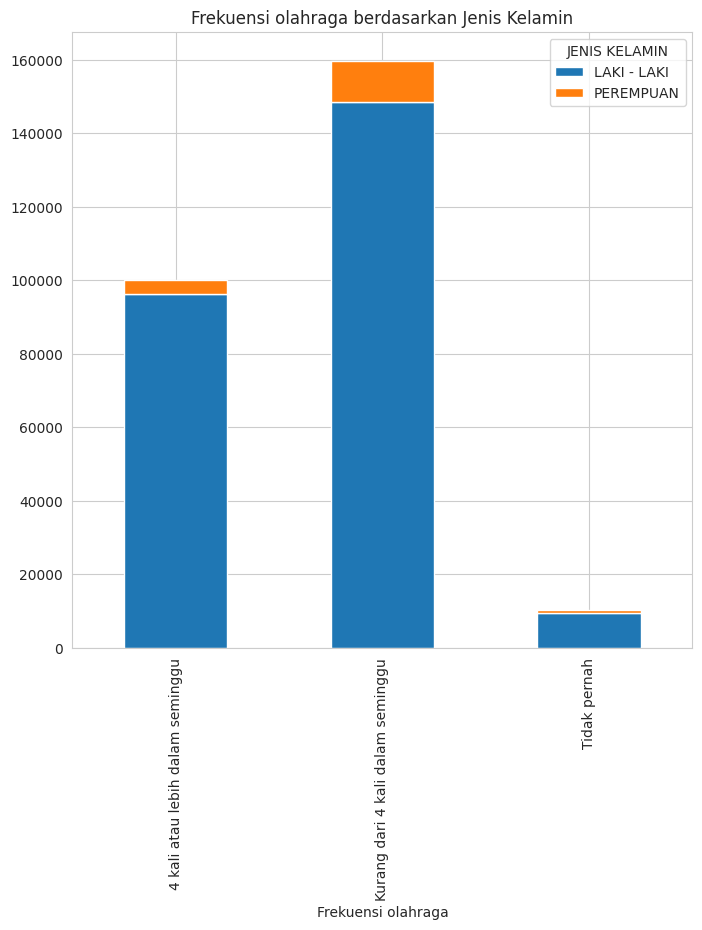

In [ ]:
JK = pd.crosstab(index=data_combined['Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?'], columns=data_combined['JENIS KELAMIN'])
plot = JK.plot(kind="bar", figsize=(8,8), stacked=True, title='Frekuensi olahraga berdasarkan Jenis Kelamin', xlabel='Frekuensi olahraga')

Berdasarkan jenis kelamin, baik laki-laki maupun perempuan, **frekuensi olahraga terbanyaknya adalah kurang dari 4 kali dalam seminggu**

####Mengamati Jumlah Obesitas di Tiap Daerah

In [ ]:
#Membuat Dataset Baru yang Berisikan Wilayah dan Indeks Masa Tubuh (IMT)
selected_columns1 = ['WILAYAH', 'IMT']
wilayah_obesitas = data_combined[selected_columns1].copy()
wilayah_obesitas

,WILAYAH,IMT
0,KALBAR,Obesitas
1,KALBAR,Normal
2,KALBAR,Normal
3,KALBAR,Obesitas
4,KALBAR,Normal
...,...,...
289794,DIY,Normal
289795,JATENG,Normal
289796,KALSEL,Normal
289799,JABAR,Kurus


In [ ]:
#Filter Data yang Mencakup Responden Obesitas
wilayah_obesitas = wilayah_obesitas[wilayah_obesitas['IMT'] == 'Obesitas']
wilayah_obesitas

,WILAYAH,IMT
0,KALBAR,Obesitas
3,KALBAR,Obesitas
9,KALBAR,Obesitas
14,SULSEL,Obesitas
19,SULSEL,Obesitas
...,...,...
289746,BANTEN,Obesitas
289748,JATIM,Obesitas
289750,JABAR,Obesitas
289751,NTT,Obesitas


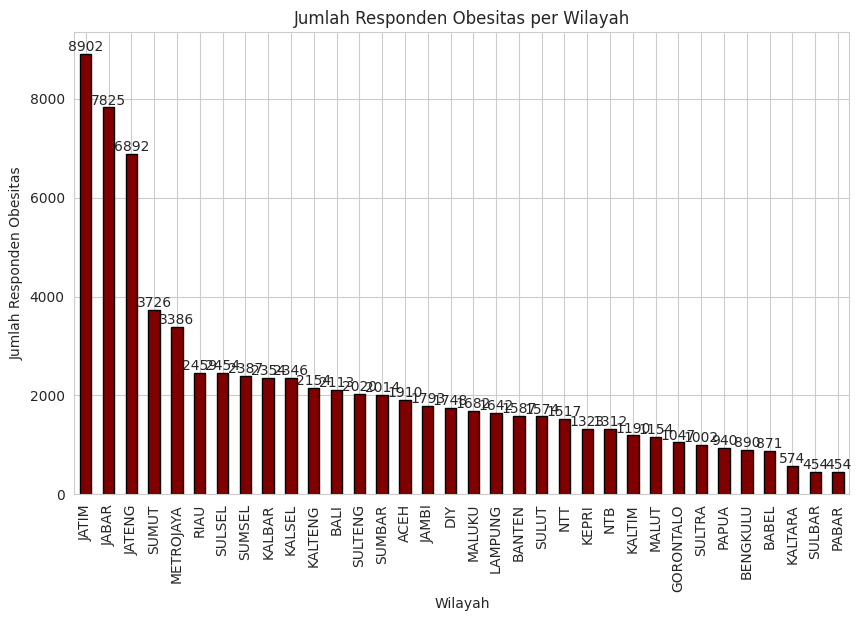

In [ ]:
#Visualisasi Jumlah Obesitas di Tiap Daerah
dfwc_obesitas = wilayah_obesitas['WILAYAH'].value_counts()

ax = dfwc_obesitas.plot(kind='bar', figsize=(10, 6), color='maroon', edgecolor='black')
plt.title('Jumlah Responden Obesitas per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Responden Obesitas')

for i, v in enumerate(dfwc_obesitas):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

Berdasarkan visualisasi di atas, diperoleh informasi bahwa **jumlah obesitas tertinggi berada di daerah Jawa Timur sebanyak 8902** orang yang kemudian **disusul oleh daerah Jawa Barat sebanyak 7825 orang.** Daerah dengan **jumlah obesitas terendah adalah Papua Barat sebanyak 454 orang.**

####Hubungan Usia dengan Penyakit terkait Gaya Hidup

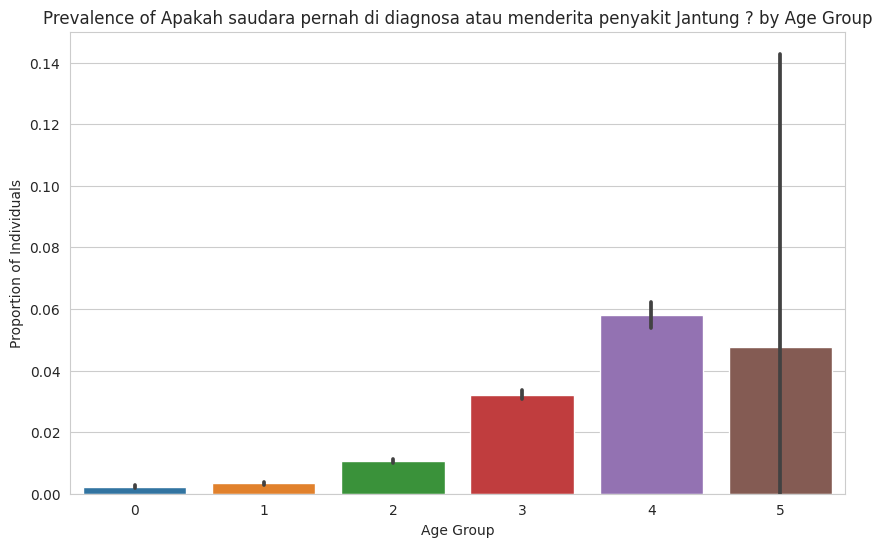

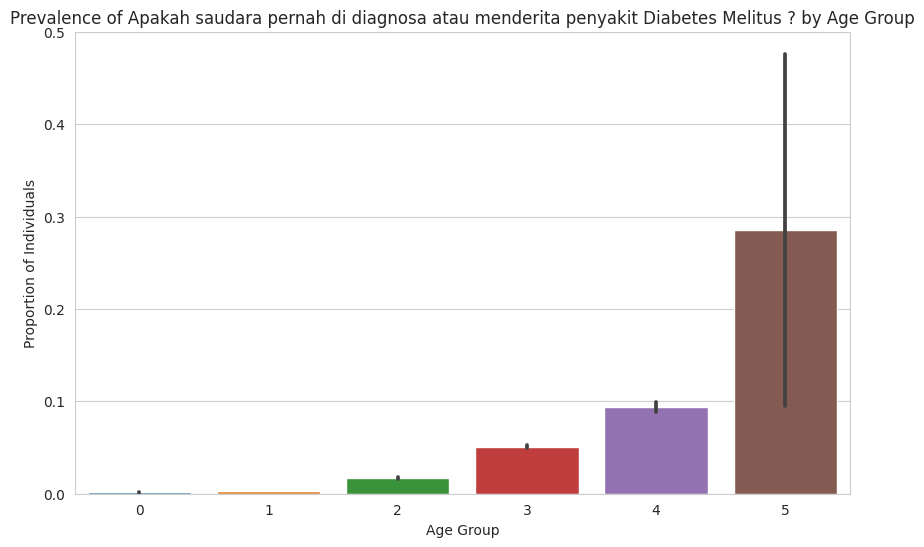

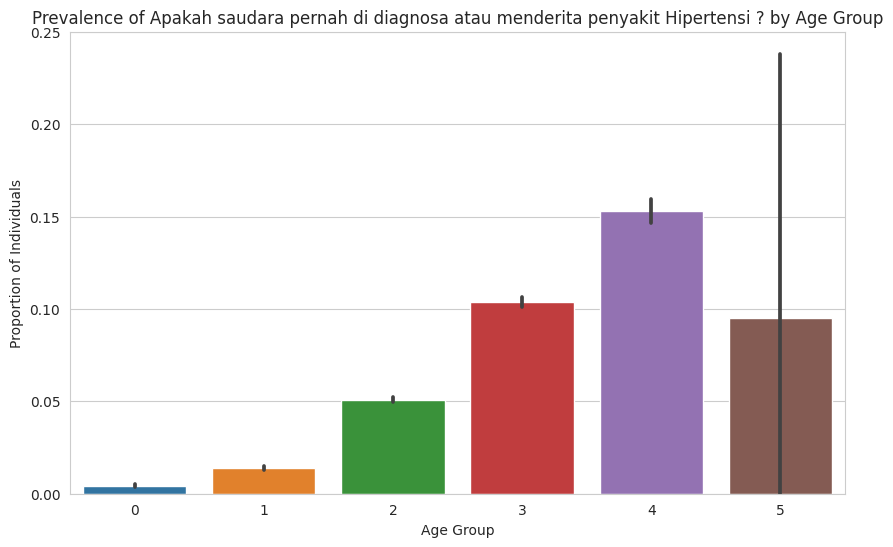

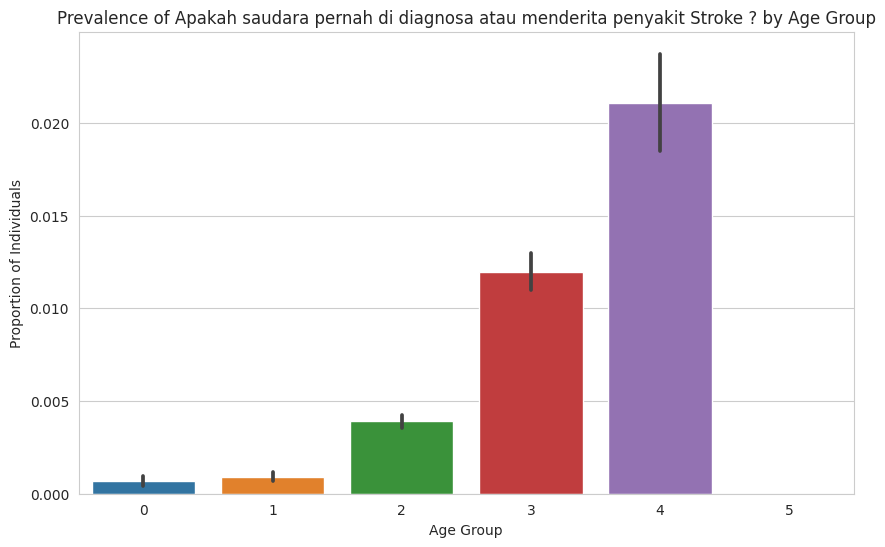

In [ ]:
disease_columns = [
    'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?'
]

sns.set_style("whitegrid")

for disease in disease_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='KELOMPOK USIA', y=disease, data=data_clas, estimator=np.mean)
    plt.title(f'Prevalence of {disease} by Age Group')
    plt.ylabel('Proportion of Individuals')
    plt.xlabel('Age Group')
    plt.show()

Berdasarkan plot, dapat dilihat bahwa semakin tua usia seseorang semakin tinggi pula kecenderungan untuk memiliki riwayat penyakit seperti penyakit Stroke, Diabetes Mellitus, dan Hipertensi dan namun yang paling tinggi kecenderungannya adalah ketika memasuki kelompok usia ke-4 dan menurun ketika memasuki kelompok usia ke-5.

####Kecenderungan Diagnosa Penyakit (Jantung, Stroke, Diabetes Melitus, dan Hipertensi) Berdasarkan Pengeluaran/Bulan

In [ ]:
#Membuat Data Frame baru yang berisikan Pengeluaran/Bulan, Jantung, Stroke, Jantung, Diabetes Melitus, dan Hipertensi
selected_columns5 = ['Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?',
                     'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?',
                     'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?',
                     'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?',
                     'PENGELUARAN/BULAN']
penyakit_expense = data_combined[selected_columns5].copy()
penyakit_expense = penyakit_expense.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?': 'Jantung',
                                                                      'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?': 'Stroke',
                                                                      'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?':'DM',
                                                                      'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?':'Hipertensi'})
penyakit_expense

,Jantung,Stroke,DM,Hipertensi,PENGELUARAN/BULAN
0,Tidak,Tidak,Tidak,Tidak,Rp. 7 Juta s.d. 10 Juta
1,Tidak,Tidak,Tidak,Tidak,Rp. 2 Juta s.d. 6 Juta
2,Tidak,Tidak,Tidak,Tidak,Rp. 2 Juta s.d. 6 Juta
3,Tidak,Tidak,Tidak,Tidak,Rp. 7 Juta s.d. 10 Juta
4,Tidak,Tidak,Tidak,Tidak,Rp. 2 Juta s.d. 6 Juta
...,...,...,...,...,...
289794,Tidak,Tidak,Tidak,Tidak,Rp. 2 Juta s.d. 6 Juta
289795,Tidak,Tidak,Tidak,Tidak,Rp. 2 Juta s.d. 6 Juta
289796,Tidak,Tidak,Tidak,Tidak,Rp. 2 Juta s.d. 6 Juta
289799,Tidak,Tidak,Tidak,Tidak,Rp. 2 Juta s.d. 6 Juta


In [ ]:
# Membuat variabel dummy untuk setiap Penyakit dan Pengeluaran/Bulan
penyakit_expense['Jantung'] = penyakit_expense['Jantung'].replace({'Ya': 1, 'Tidak': 0})
penyakit_expense['Stroke'] = penyakit_expense['Stroke'].replace({'Ya': 1, 'Tidak': 0})
penyakit_expense['DM'] = penyakit_expense['DM'].replace({'Ya': 1, 'Tidak': 0})
penyakit_expense['Hipertensi'] = penyakit_expense['Hipertensi'].replace({'Ya': 1, 'Tidak': 0})

penyakit_expense['PENGELUARAN/BULAN'] = penyakit_expense['PENGELUARAN/BULAN'].replace({
    'Di atas Rp. 15 Juta': 3,
    'Rp. 11 Juta s.d. 14 Juta': 2,
    'Rp. 2 Juta s.d. 6 Juta': 0,
    'Rp. 7 Juta s.d. 10 Juta': 1
})

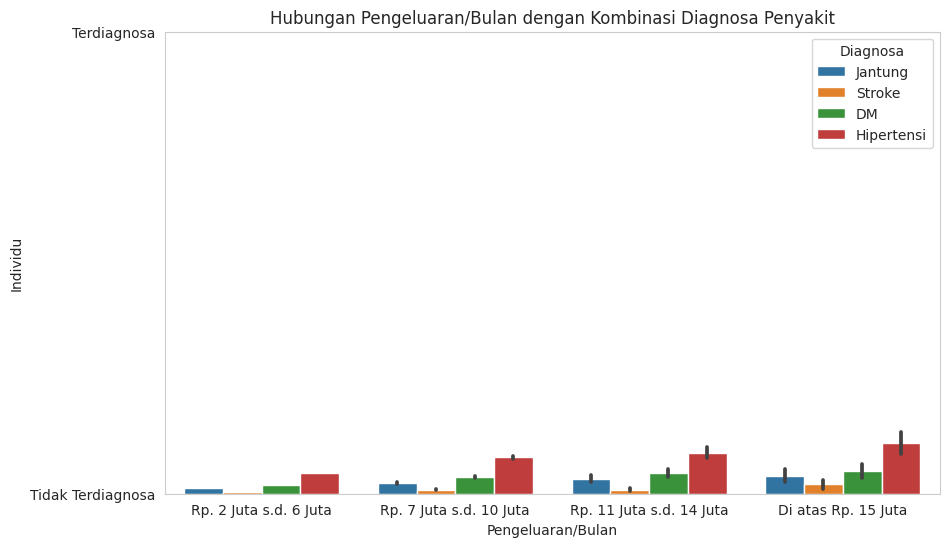

In [ ]:
# Melt DataFrame untuk mempermudah plotting
df_melted = pd.melt(penyakit_expense, id_vars=['PENGELUARAN/BULAN'], value_vars=['Jantung', 'Stroke', 'DM', 'Hipertensi'],
                    var_name='Diagnosa', value_name='Dummy')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='PENGELUARAN/BULAN', y='Dummy', hue='Diagnosa', data=df_melted, orient='v', dodge=True)
plt.title('Hubungan Pengeluaran/Bulan dengan Kombinasi Diagnosa Penyakit')
plt.xlabel('Pengeluaran/Bulan')
plt.ylabel('Individu')
plt.yticks([0, 1], ['Tidak Terdiagnosa', 'Terdiagnosa'])
plt.xticks([0, 1, 2, 3], ['Rp. 2 Juta s.d. 6 Juta', 'Rp. 7 Juta s.d. 10 Juta', 'Rp. 11 Juta s.d. 14 Juta', 'Di atas Rp. 15 Juta'])

plt.show()

Berdasarkan plot di atas, **orang dengan pengeluaran/bulan di atas Rp15.000.000,00 lebih cenderung mendekati diagnosa penyakit Jantung, Stroke, Diabetes Melitus, dan Hipertensi** jika dibandingkan dengan orang yang pengeluaran/bulan di bawah Rp15.000.000,00. Terlihat pula s**emakin tinggi pengeluaran/bulan, maka cenderung akan terdiagnosa penyakit Hipertensi.**

####Asosiasi Nilai Rata-rata IMT berdasarkan Kelompok Usia

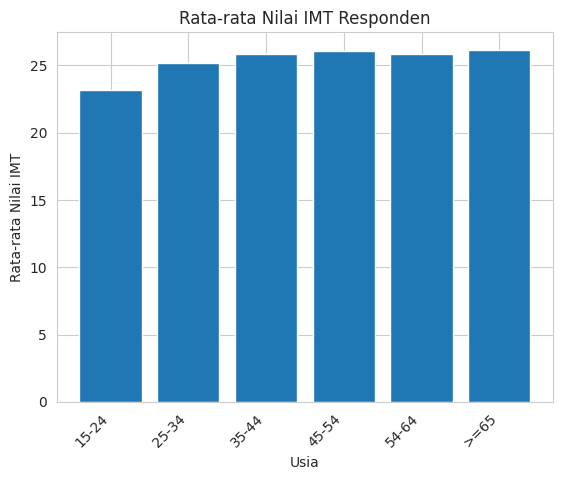

In [ ]:
df_avg = df.groupby('KELOMPOK USIA')['NILAI IMT'].mean().reset_index()
#Plotting
plt.bar(df_avg['KELOMPOK USIA'], df_avg['NILAI IMT'])
plt.title('Rata-rata Nilai IMT Responden')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Nilai IMT')
plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan visualisasi diatas, dapat disimpulkan bahwa **tidak terdapat perbedaan rata-rata Nilai IMT yang cukup signifikan jika dilihat berdasarkan umur responden**

# Uji Statistik

In [ ]:
!gdown 1f_r9VmYAIKTzm7zuQV1bzkojtVPO4i-d

data_combined = pd.read_csv("https://drive.google.com/uc?id=1f_r9VmYAIKTzm7zuQV1bzkojtVPO4i-d")
df = data_combined

Downloading...
From: https://drive.google.com/uc?id=1f_r9VmYAIKTzm7zuQV1bzkojtVPO4i-d
To: /content/data_combined.csv
100% 104M/104M [00:00<00:00, 221MB/s] 


##Variabel Nilai IMT

###Uji Normalitas Variabel Nilai IMT

In [ ]:
data_uji = df['NILAI IMT']

In [ ]:
# Melakukan uji Shapiro-Wilk
statistic, p_value = stats.shapiro(data_uji)

# Menampilkan hasil uji
print("Nilai Statistik:", statistic)
print("Nilai p:", p_value)

Nilai Statistik: 0.9907821416854858
Nilai p: 0.0


In [ ]:
# Melakukan uji Kolmogorov-Smirnov
statistic, p_value = stats.kstest(data_uji, 'norm')

# Menampilkan hasil uji
print("Nilai Statistik:", statistic)
print("Nilai p:", p_value)

Nilai Statistik: 1.0
Nilai p: 0.0


In [ ]:
# Melakukan uji Anderson-Darling
result = stats.anderson(data_uji)

# Menampilkan hasil uji
print("Statistik Anderson-Darling:", result.statistic)
print("Nilai kritis:", result.critical_values)
print("Tingkat signifikansi:", result.significance_level)

Statistik Anderson-Darling: 632.291678377951
Nilai kritis: [0.576 0.656 0.787 0.918 1.092]
Tingkat signifikansi: [15.  10.   5.   2.5  1. ]


Berdasarkan Uji Normalitas yang telah dilakukan, didapatkan kesimpulan bahwa data Nilai IMT tidak berdistribusi normal, sehingga akan dilakukan Uji Mann-Whitney untuk membandingkan nilai rata-rata nilai IMT

###Mann-Whitney Test



Akan dilakukan Mann-Whitney Test untuk **membandingkan rata-rata Nilai IMT antara jenis kelamin laki-laki dan perempuan**

In [ ]:
nilai_imt = df['NILAI IMT']
jenis_kelamin = df['JENIS KELAMIN']

imt_male = [nilai_imt[i] for i in range(len(nilai_imt)) if jenis_kelamin[i] == 'LAKI - LAKI']
imt_female = [nilai_imt[i] for i in range(len(nilai_imt)) if jenis_kelamin[i] == 'PEREMPUAN']

In [ ]:
# Inisialisasi rata-rata IMT untuk masing-masing jenis kelamin
rata_imt_male = 0
rata_imt_female = 0

# Menghitung jumlah individu untuk masing-masing jenis kelamin
count_male = 0
count_female = 0

# Menghitung total IMT untuk masing-masing jenis kelamin
for i in range(len(nilai_imt)):
    if jenis_kelamin[i] == 'LAKI - LAKI':
        rata_imt_male += nilai_imt[i]
        count_male += 1
    elif jenis_kelamin[i] == 'PEREMPUAN':
        rata_imt_female += nilai_imt[i]
        count_female += 1

# Menghitung rata-rata IMT untuk masing-masing jenis kelamin
rata_imt_male /= count_male
rata_imt_female /= count_female

# Tampilkan hasil
print("Rata-rata IMT untuk jenis kelamin Laki-laki:", rata_imt_male)
print("Rata-rata IMT untuk jenis kelamin Perempuan:", rata_imt_female)

Rata-rata IMT untuk jenis kelamin Laki-laki: 25.423141416623128
Rata-rata IMT untuk jenis kelamin Perempuan: 24.732309608195358


Dapat dilihat bahwa terdapat perbedaan rata-rata Nilai IMT antar jenis kelamin

In [ ]:
# Hitung Mann-Whitney U test
statistic, p_value = mannwhitneyu(imt_male, imt_female)

# Tampilkan hasil
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 2281977755.5
P-value: 2.126943541245646e-211


Berdasarkan Mann-Whitney U test, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam rata-rata nilai IMT antara jenis kelamin yang diuji

##Variabel Skor Kesehatan Mental

In [ ]:
pemetaan = {'Tidak': 1, 'Kadang - kadang': 2, 'Ya': 3}
kolom_terpilih = ["Sering menderita sakit kepala ?","Tidak nafsu makan ?","Sulit tidur ?","Mudah takut ?","Merasa tegang, cemas atau kuatir ?","Tangan anda gemetar ?","Sulit untuk berpikir jernih ?",
                  "Merasa tidak bahagia ?","Menangis lebih sering ?","Merasa sulit untuk menikmati kegiatan sehari – hari?","Sulit untuk mengambil keputusan ?","Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?",
                  "Kehilangan minat pada berbagai hal ?","Tidak merasa berharga?","Mempunyai pikiran untuk mengakhiri hidup?","Merasa lelah sepanjang waktu?","Mengalami rasa tidak enak di perut?","Mudah lelah ?"]
data_combined[kolom_terpilih] = data_combined[kolom_terpilih].replace(pemetaan)

data_combined['Total Skor'] = data_combined[kolom_terpilih].sum(axis=1)

In [ ]:
data_uji2 = data_combined['Total Skor']

####Uji Normalitas Varibael Skor Kesehatan Mental

In [ ]:
# Melakukan uji Shapiro-Wilk
statistic, p_value = stats.shapiro(data_uji2)

# Menampilkan hasil uji
print("Nilai Statistik:", statistic)
print("Nilai p:", p_value)

Nilai Statistik: 0.5828563570976257
Nilai p: 0.0


In [ ]:
# Melakukan uji Kolmogorov-Smirnov
statistic, p_value = stats.kstest(data_uji2, 'norm')

# Menampilkan hasil uji
print("Nilai Statistik:", statistic)
print("Nilai p:", p_value)

Nilai Statistik: 1.0
Nilai p: 0.0


In [ ]:
# Melakukan uji Anderson-Darling
result = stats.anderson(data_uji2)

# Menampilkan hasil uji
print("Statistik Anderson-Darling:", result.statistic)
print("Nilai kritis:", result.critical_values)
print("Tingkat signifikansi:", result.significance_level)

Statistik Anderson-Darling: 35883.08171589929
Nilai kritis: [0.576 0.656 0.787 0.918 1.092]
Tingkat signifikansi: [15.  10.   5.   2.5  1. ]


Berdasarkan Uji Normalitas yang telah dilakukan, didapatkan kesimpulan bahwa data Nilai Kesehatan Mental tidak berdistribusi normal, sehingga akan dilakukan Uji Mann-Whitney untuk membandingkan nilai rata-rata nilai Nilai Kesehatan Mental

###Mann-Whitney Test



Akan dilakukan Mann-Whitney Test untuk **membandingkan rata-rata Nilai Kesehatan Mental antara jenis kelamin laki-laki dan perempuan**

In [ ]:
nilai_mental = data_combined['Total Skor']
jenis_kelamin = data_combined['JENIS KELAMIN']

mental_male = [nilai_mental[i] for i in range(len(nilai_mental)) if jenis_kelamin[i] == 'LAKI - LAKI']
mental_female = [nilai_mental[i] for i in range(len(nilai_mental)) if jenis_kelamin[i] == 'PEREMPUAN']

In [ ]:
# Inisialisasi rata-rata Kesehatan Mental untuk masing-masing jenis kelamin
rata_mental_male = 0
rata_mental_female = 0

# Menghitung jumlah individu untuk masing-masing jenis kelamin
count_male = 0
count_female = 0

# Menghitung total Kesehatan Mental untuk masing-masing jenis kelamin
for i in range(len(nilai_mental)):
    if jenis_kelamin[i] == 'LAKI - LAKI':
        rata_mental_male += nilai_mental[i]
        count_male += 1
    elif jenis_kelamin[i] == 'PEREMPUAN':
        rata_mental_female += nilai_mental[i]
        count_female += 1

# Menghitung rata-rata Kesehatan Mental untuk masing-masing jenis kelamin
rata_mental_male /= count_male
rata_mental_female /= count_female

# Tampilkan hasil
print("Rata-rata Kesehatan Mental untuk jenis kelamin Laki-laki:", rata_mental_male)
print("Rata-rata Kesehatan Mental untuk jenis kelamin Perempuan:", rata_mental_female)

Rata-rata Kesehatan Mental untuk jenis kelamin Laki-laki: 19.499327158405013
Rata-rata Kesehatan Mental untuk jenis kelamin Perempuan: 19.48271455045051


Dapat dilihat bahwa terdapat perbedaan rata-rata Nilai Score Kesehatan Mental antar jenis kelamin

In [ ]:
# Hitung Mann-Whitney U test
statistic, p_value = mannwhitneyu(mental_male, mental_female)

# Tampilkan hasil
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: 1954942114.5
P-value: 9.870027306594265e-05


Berdasarkan Mann-Whitney U test, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam rata-rata nilai Score Kesehatan Mental antara jenis kelamin yang diuji

##Korelasi

In [ ]:
correlation_matrix = data_combined[['Total Skor','NILAI IMT']].corr()

print(correlation_matrix)

            Total Skor  NILAI IMT
Total Skor    1.000000   0.045653
NILAI IMT     0.045653   1.000000


Korelasi antara "Total Skor" dan "NILAI IMT" adalah 0.045653. Angka ini menunjukkan hubungan linier antara kedua variabel tersebut. Dalam hal ini, korelasi sangat rendah, mendekati nol, sehingga dapat dikatakan bahwa tidak ada hubungan linier yang signifikan antara "Total Skor" dan "NILAI IMT"

##Model Regresi Linear

###Model Hubungan Total Skor Kesehatan Mental dengan Jenis Kelamin dan Nilai IMT

In [ ]:
model_columns = ['Total Skor','JENIS KELAMIN','NILAI IMT']
df_new = data_combined.copy()[model_columns]
print(df_new.info())
# One-hot-encoding.
df_dummies =  pd.get_dummies(df_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269795 entries, 0 to 269794
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Total Skor     269795 non-null  int64  
 1   JENIS KELAMIN  269795 non-null  object 
 2   NILAI IMT      269795 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None


In [ ]:
display(df_dummies.head())

,Total Skor,NILAI IMT,JENIS KELAMIN_LAKI - LAKI,JENIS KELAMIN_PEREMPUAN
0,19,29.796114,1,0
1,18,24.364563,1,0
2,20,20.883912,1,0
3,18,28.753975,1,0
4,19,22.911836,1,0


In [ ]:
X = df_dummies.drop(columns = ['Total Skor'])
Y = df_dummies['Total Skor']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [ ]:
print("Training Data :")
print(f"X shape = {X_train.shape}")
print(f"y shape = {y_train.shape}")
print("Validation Data :")
print(f"X shape = {X_test.shape}")
print(f"y shape = {y_test.shape}")
X_train.head()

Training Data :
X shape = (215836, 3)
y shape = (215836,)
Validation Data :
X shape = (53959, 3)
y shape = (53959,)


,NILAI IMT,JENIS KELAMIN_LAKI - LAKI,JENIS KELAMIN_PEREMPUAN
40901,28.650138,1,0
188493,23.781213,1,0
120620,25.559329,1,0
175546,24.092971,1,0
73337,27.084159,1,0


In [ ]:
lr = LinearRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)
mae_score = mean_absolute_error(y_test, y_pred)
mse_score = mean_squared_error(y_test,y_pred)
r2 = lr.score(X_train,y_train)

print('Model Evaluation :')
print('R-Squared Score for model :')
print(r2)
print('MSE score :')
print(mse_score)
print('MAE score :')
print(mae_score)

Model Evaluation :
R-Squared Score for model :
0.002097751210357379
MSE score :
7.889590548204532
MAE score :
1.7921236820148763


In [ ]:
X_train_copy = X_train.copy()
Y_train_copy = y_train.copy()
X_train_copy = sm.add_constant(X_train_copy)
model = sm.OLS(Y_train_copy, X_train_copy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Total Skor   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     226.9
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           3.80e-99
Time:                        16:07:14   Log-Likelihood:            -5.2894e+05
No. Observations:              215836   AIC:                         1.058e+06
Df Residuals:                  215833   BIC:                         1.058e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Model ini memiliki tiga variabel independen: "NILAI IMT," "JENIS KELAMIN_LAKI - LAKI," dan "JENIS KELAMIN_PEREMPUAN." Variabel dependennya adalah "Total Skor."

Koefisien yang terkait dengan variabel independen adalah:
- Nilai tetap (const) adalah 12.2843.
- Koefisien untuk "NILAI IMT" adalah 0.0427.
- Koefisien untuk "JENIS KELAMIN_LAKI - LAKI" adalah 6.1306.
- Koefisien untuk "JENIS KELAMIN_PEREMPUAN" adalah 6.1536.

Nilai R-squared model ini adalah 0.002, yang menunjukkan bahwa hanya sebagian kecil variasi dalam variabel dependen yang dapat dijelaskan oleh variabel independen. Nilai F-statistik adalah 226.9, dan probabilitas yang terkait sangat mendekati nol, menunjukkan bahwa model secara statistik signifikan secara keseluruhan.